# Predicting Hotel Cancellations

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [12]:
import pandas as pd
hotels = pd.read_csv("data/hotel_bookings.csv")
#hotels = pd.read_csv("Hotel Reservations.csv")
hotels

Booking_ID  no_of_adults  ...  no_of_special_requests  booking_status
0       INN00001           NaN  ...                     NaN    Not_Canceled
1       INN00002           2.0  ...                     1.0    Not_Canceled
2       INN00003           1.0  ...                     0.0        Canceled
3       INN00004           2.0  ...                     0.0        Canceled
4       INN00005           2.0  ...                     0.0        Canceled
...          ...           ...  ...                     ...             ...
36270   INN36271           3.0  ...                     1.0    Not_Canceled
36271   INN36272           2.0  ...                     2.0        Canceled
36272   INN36273           2.0  ...                     2.0    Not_Canceled
36273   INN36274           2.0  ...                     0.0        Canceled
36274   INN36275           2.0  ...                     0.0    Not_Canceled

[36275 rows x 19 columns]

In [13]:
hotels.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [14]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [15]:
hotels.describe()

no_of_adults  no_of_children  ...  avg_price_per_room  no_of_special_requests
count  35862.000000    35951.000000  ...        35815.000000            35486.000000
mean       1.845017        0.105366  ...          103.418207                0.619343
std        0.518652        0.402871  ...           35.057342                0.785849
min        0.000000        0.000000  ...            0.000000                0.000000
25%        2.000000        0.000000  ...           80.300000                0.000000
50%        2.000000        0.000000  ...           99.450000                0.000000
75%        2.000000        0.000000  ...          120.000000                1.000000
max        4.000000       10.000000  ...          540.000000                5.000000

[8 rows x 14 columns]

filling na variable for non-cat Data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

create useful statistics

create model for prediction

comparing different models

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay

In [18]:
hotels.isnull().sum()


Booking_ID                                 0
no_of_adults                             413
no_of_children                           324
no_of_weekend_nights                     367
no_of_week_nights                        807
type_of_meal_plan                        526
required_car_parking_space              2592
room_type_reserved                      1171
lead_time                                472
arrival_year                             378
arrival_month                            504
arrival_date                             981
market_segment_type                     1512
repeated_guest                           586
no_of_previous_cancellations             497
no_of_previous_bookings_not_canceled     550
avg_price_per_room                       460
no_of_special_requests                   789
booking_status                             0
dtype: int64

In [19]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

In [20]:
colss_cat = ['type_of_meal_plan','room_type_reserved','market_segment_type']
colss_numeric = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','repeated_guest','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [21]:
# Different types of imputers
mean_imputer = SimpleImputer(strategy='mean')

In [22]:
# Imputation
hotels[colss_numeric] = mean_imputer.fit_transform(hotels[colss_numeric])

In [23]:
#ss
frequent_imputer = SimpleImputer(strategy='most_frequent')
#imput
hotels[colss_cat] = frequent_imputer.fit_transform(hotels[colss_cat])

In [24]:
hotels.head()

Booking_ID  no_of_adults  ...  no_of_special_requests  booking_status
0   INN00001      1.845017  ...                0.619343    Not_Canceled
1   INN00002      2.000000  ...                1.000000    Not_Canceled
2   INN00003      1.000000  ...                0.000000        Canceled
3   INN00004      2.000000  ...                0.000000        Canceled
4   INN00005      2.000000  ...                0.000000        Canceled

[5 rows x 19 columns]

In [25]:
hotels.drop(0)

Booking_ID  no_of_adults  ...  no_of_special_requests  booking_status
1       INN00002           2.0  ...                     1.0    Not_Canceled
2       INN00003           1.0  ...                     0.0        Canceled
3       INN00004           2.0  ...                     0.0        Canceled
4       INN00005           2.0  ...                     0.0        Canceled
5       INN00006           2.0  ...                     1.0        Canceled
...          ...           ...  ...                     ...             ...
36270   INN36271           3.0  ...                     1.0    Not_Canceled
36271   INN36272           2.0  ...                     2.0        Canceled
36272   INN36273           2.0  ...                     2.0    Not_Canceled
36273   INN36274           2.0  ...                     0.0        Canceled
36274   INN36275           2.0  ...                     0.0    Not_Canceled

[36274 rows x 19 columns]

In [26]:
hotels.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [27]:
hotels.dropna()

Booking_ID  no_of_adults  ...  no_of_special_requests  booking_status
0       INN00001      1.845017  ...                0.619343    Not_Canceled
1       INN00002      2.000000  ...                1.000000    Not_Canceled
2       INN00003      1.000000  ...                0.000000        Canceled
3       INN00004      2.000000  ...                0.000000        Canceled
4       INN00005      2.000000  ...                0.000000        Canceled
...          ...           ...  ...                     ...             ...
36270   INN36271      3.000000  ...                1.000000    Not_Canceled
36271   INN36272      2.000000  ...                2.000000        Canceled
36272   INN36273      2.000000  ...                2.000000    Not_Canceled
36273   INN36274      2.000000  ...                0.000000        Canceled
36274   INN36275      2.000000  ...                0.000000    Not_Canceled

[36275 rows x 19 columns]

# **Starting Analysis**

In [56]:
hotels.booking_status.unique()

array([1, 0])

<AxesSubplot: >

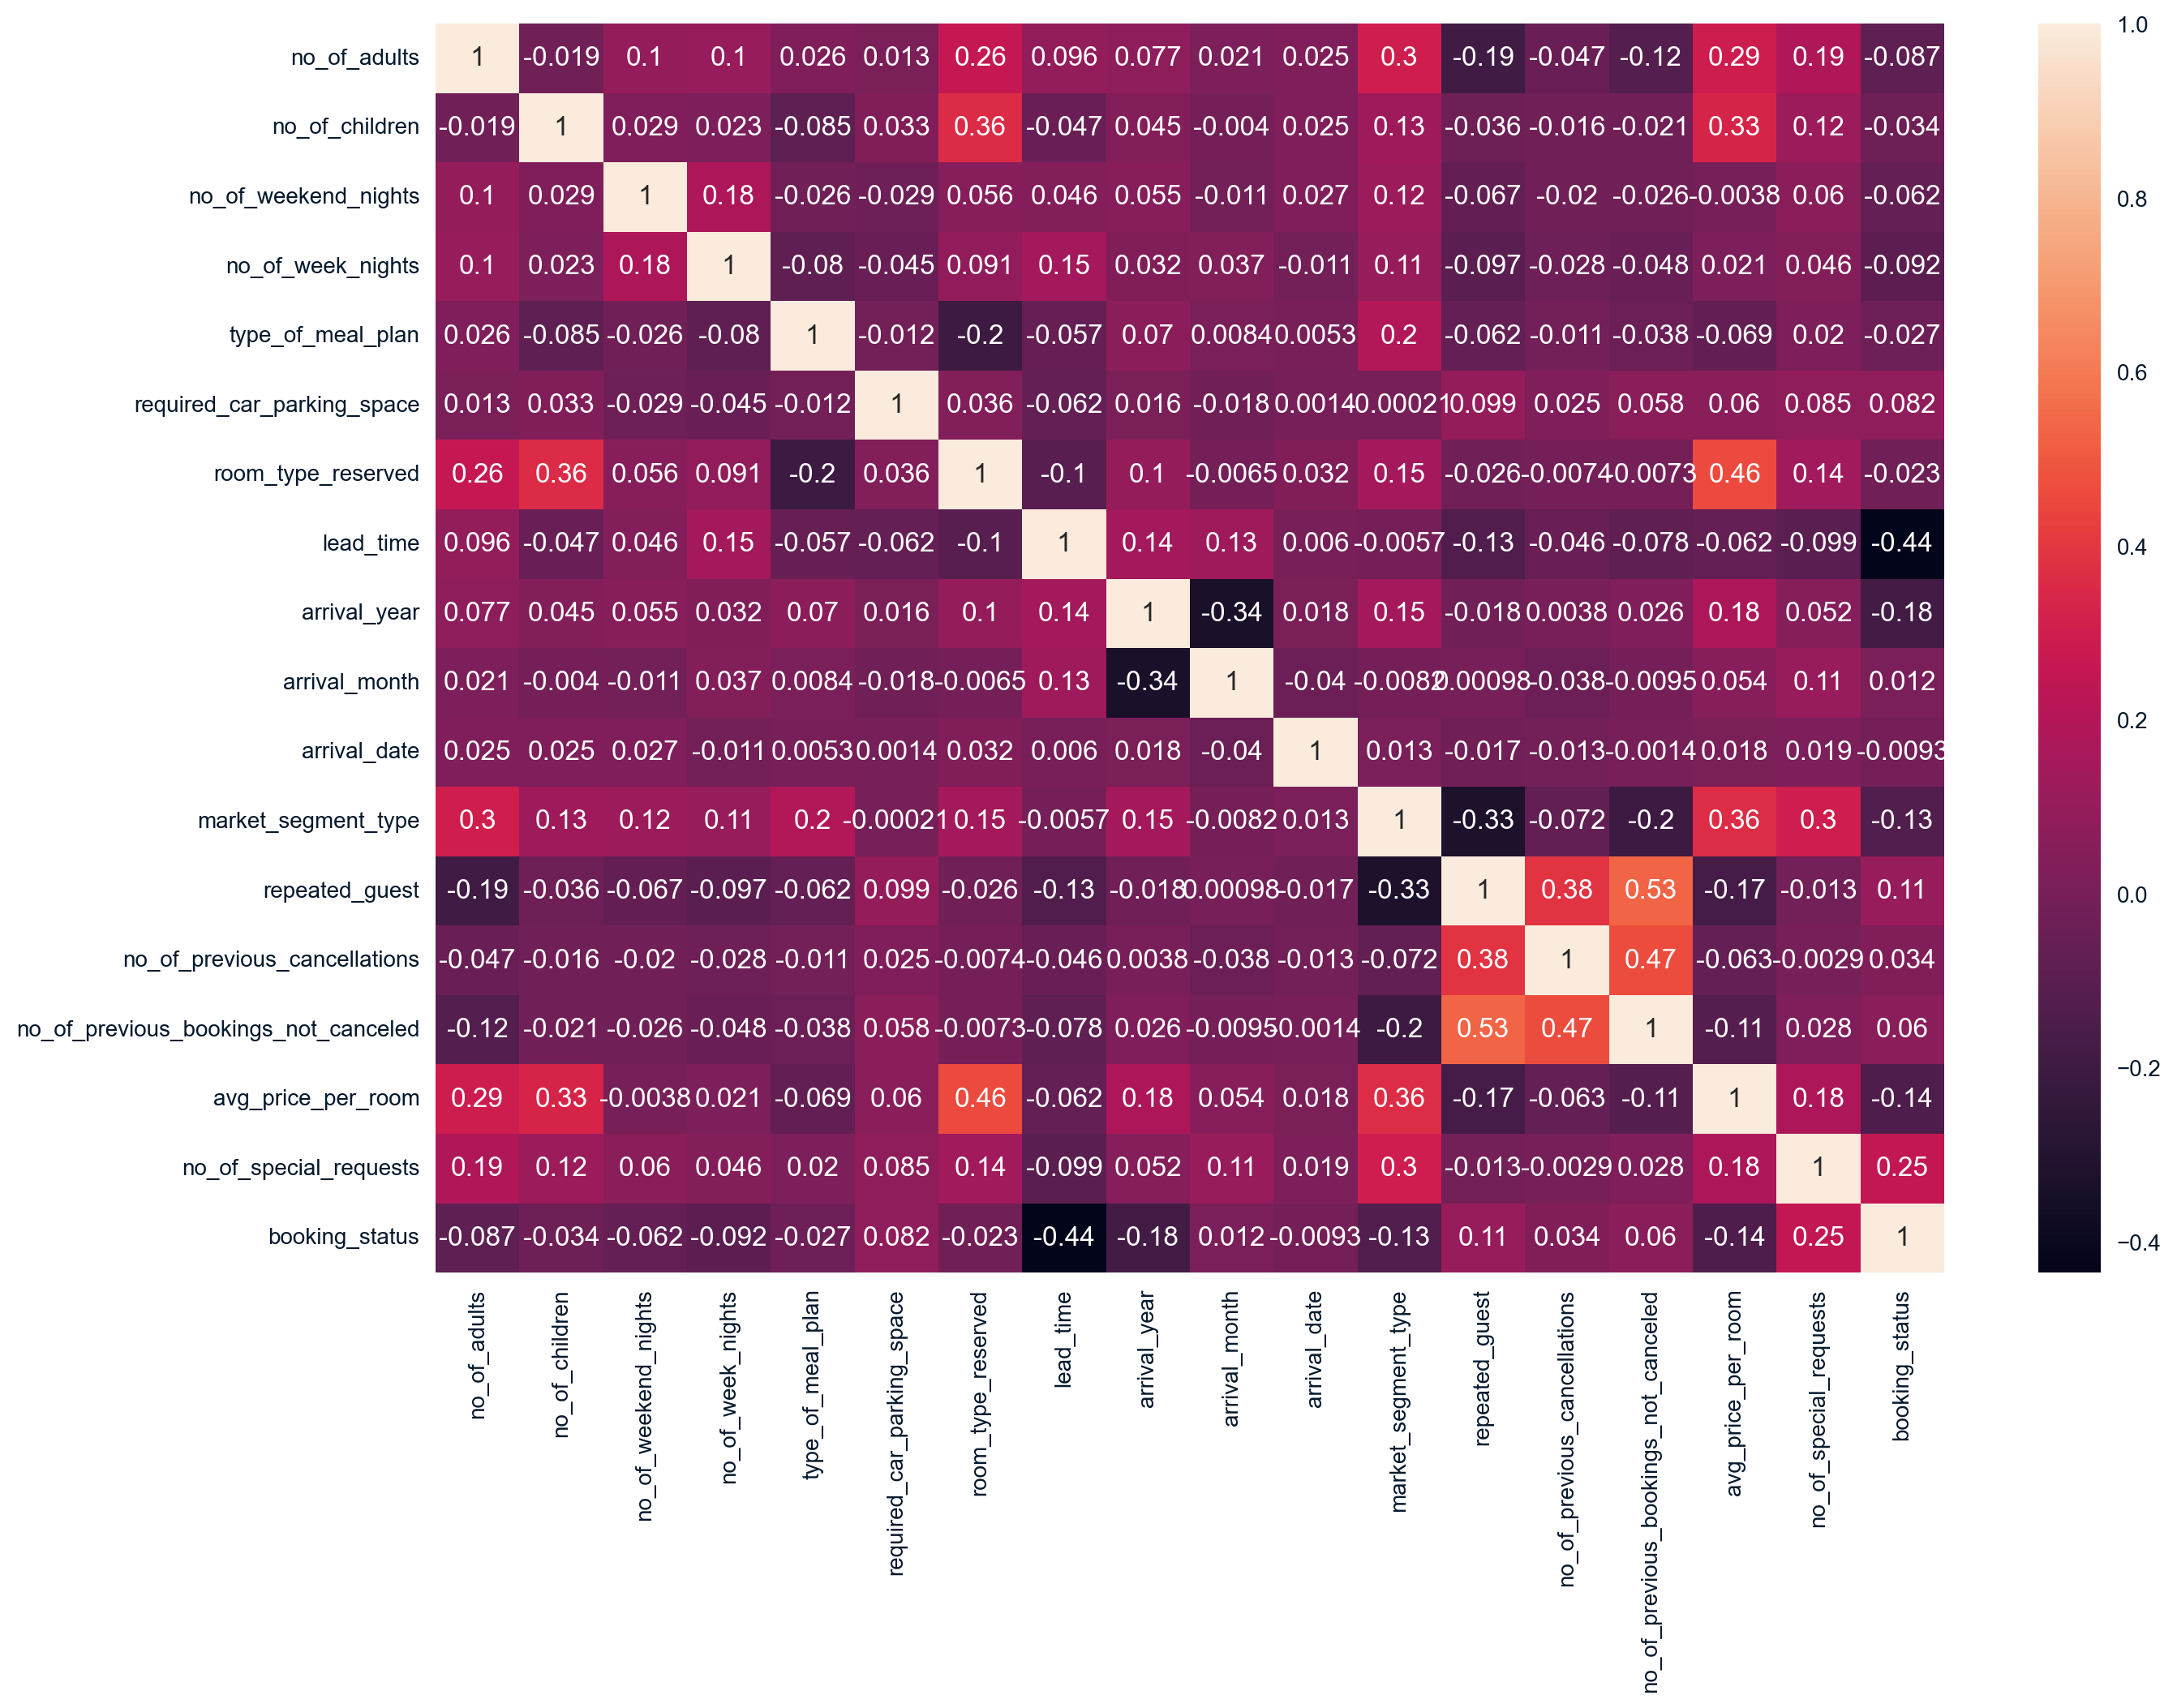

In [57]:
plt.figure(figsize = (15,10))
sns.heatmap(hotels.corr(),annot=True)

In [58]:


df_numerical=hotels.select_dtypes(exclude='object')
df_numerical.head(3)



no_of_adults  no_of_children  ...  no_of_special_requests  booking_status
0      1.845017        0.105366  ...                0.619343               1
1      2.000000        0.000000  ...                1.000000               1
2      1.000000        0.000000  ...                0.000000               0

[3 rows x 18 columns]

In [59]:


numerical_col=[]
for c in df_numerical:
    numerical_col.append(c)


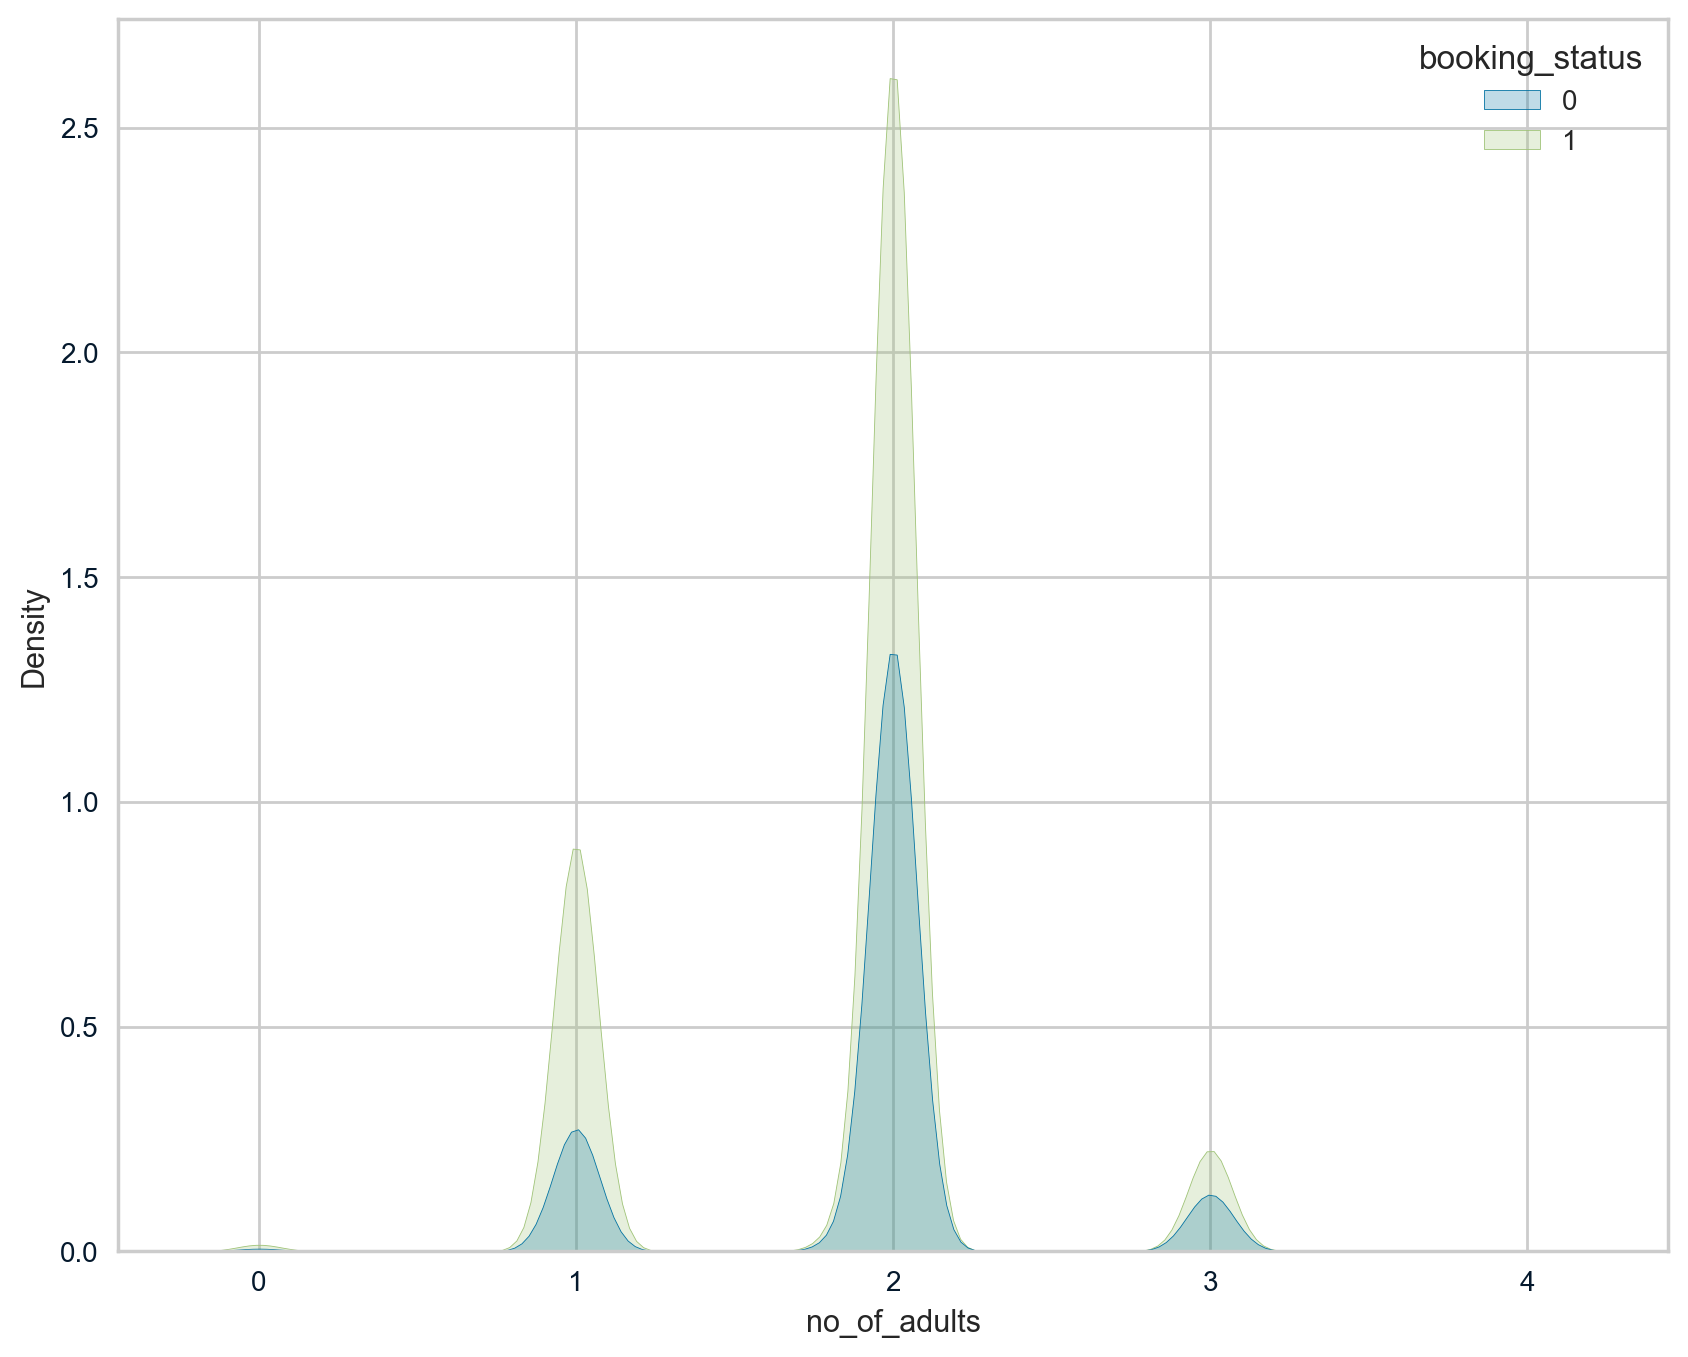

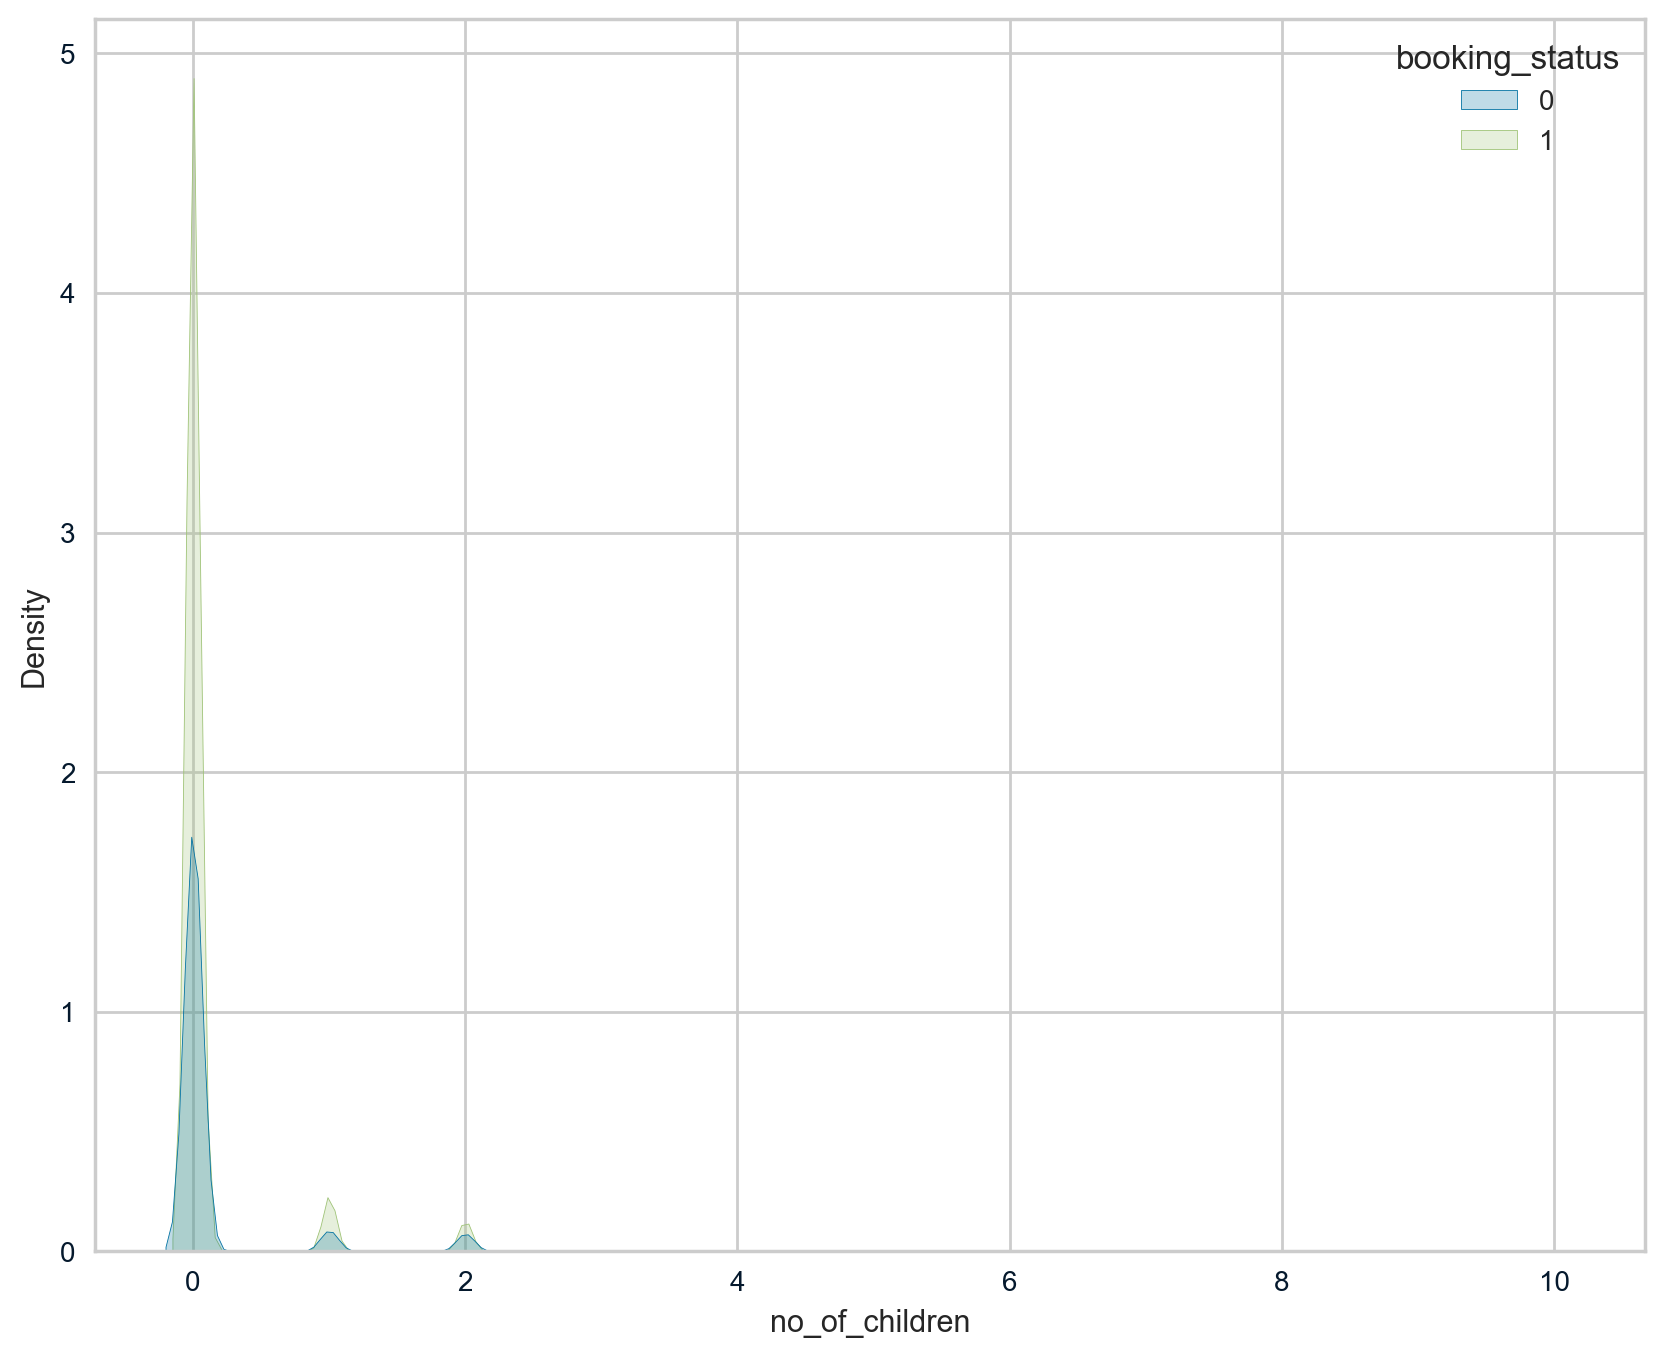

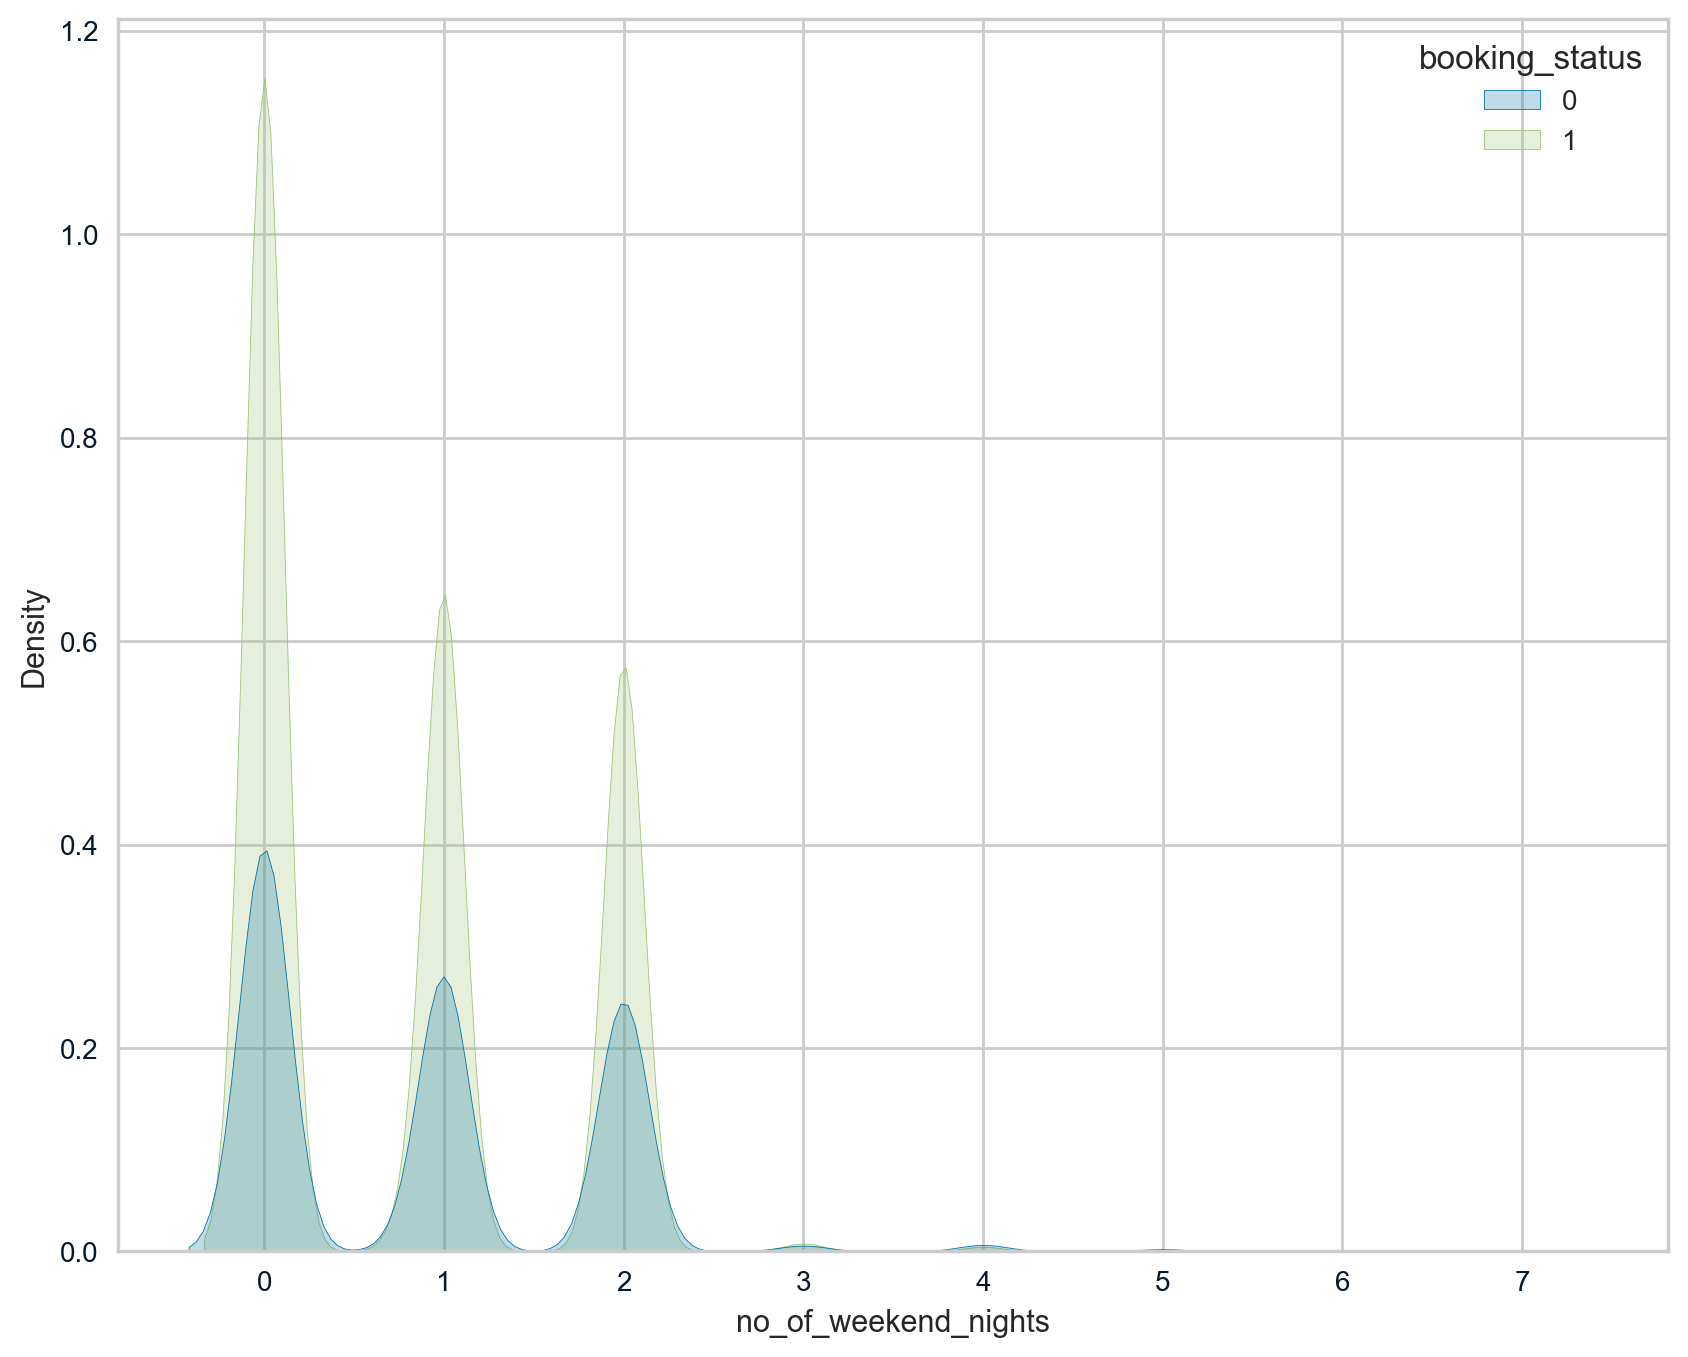

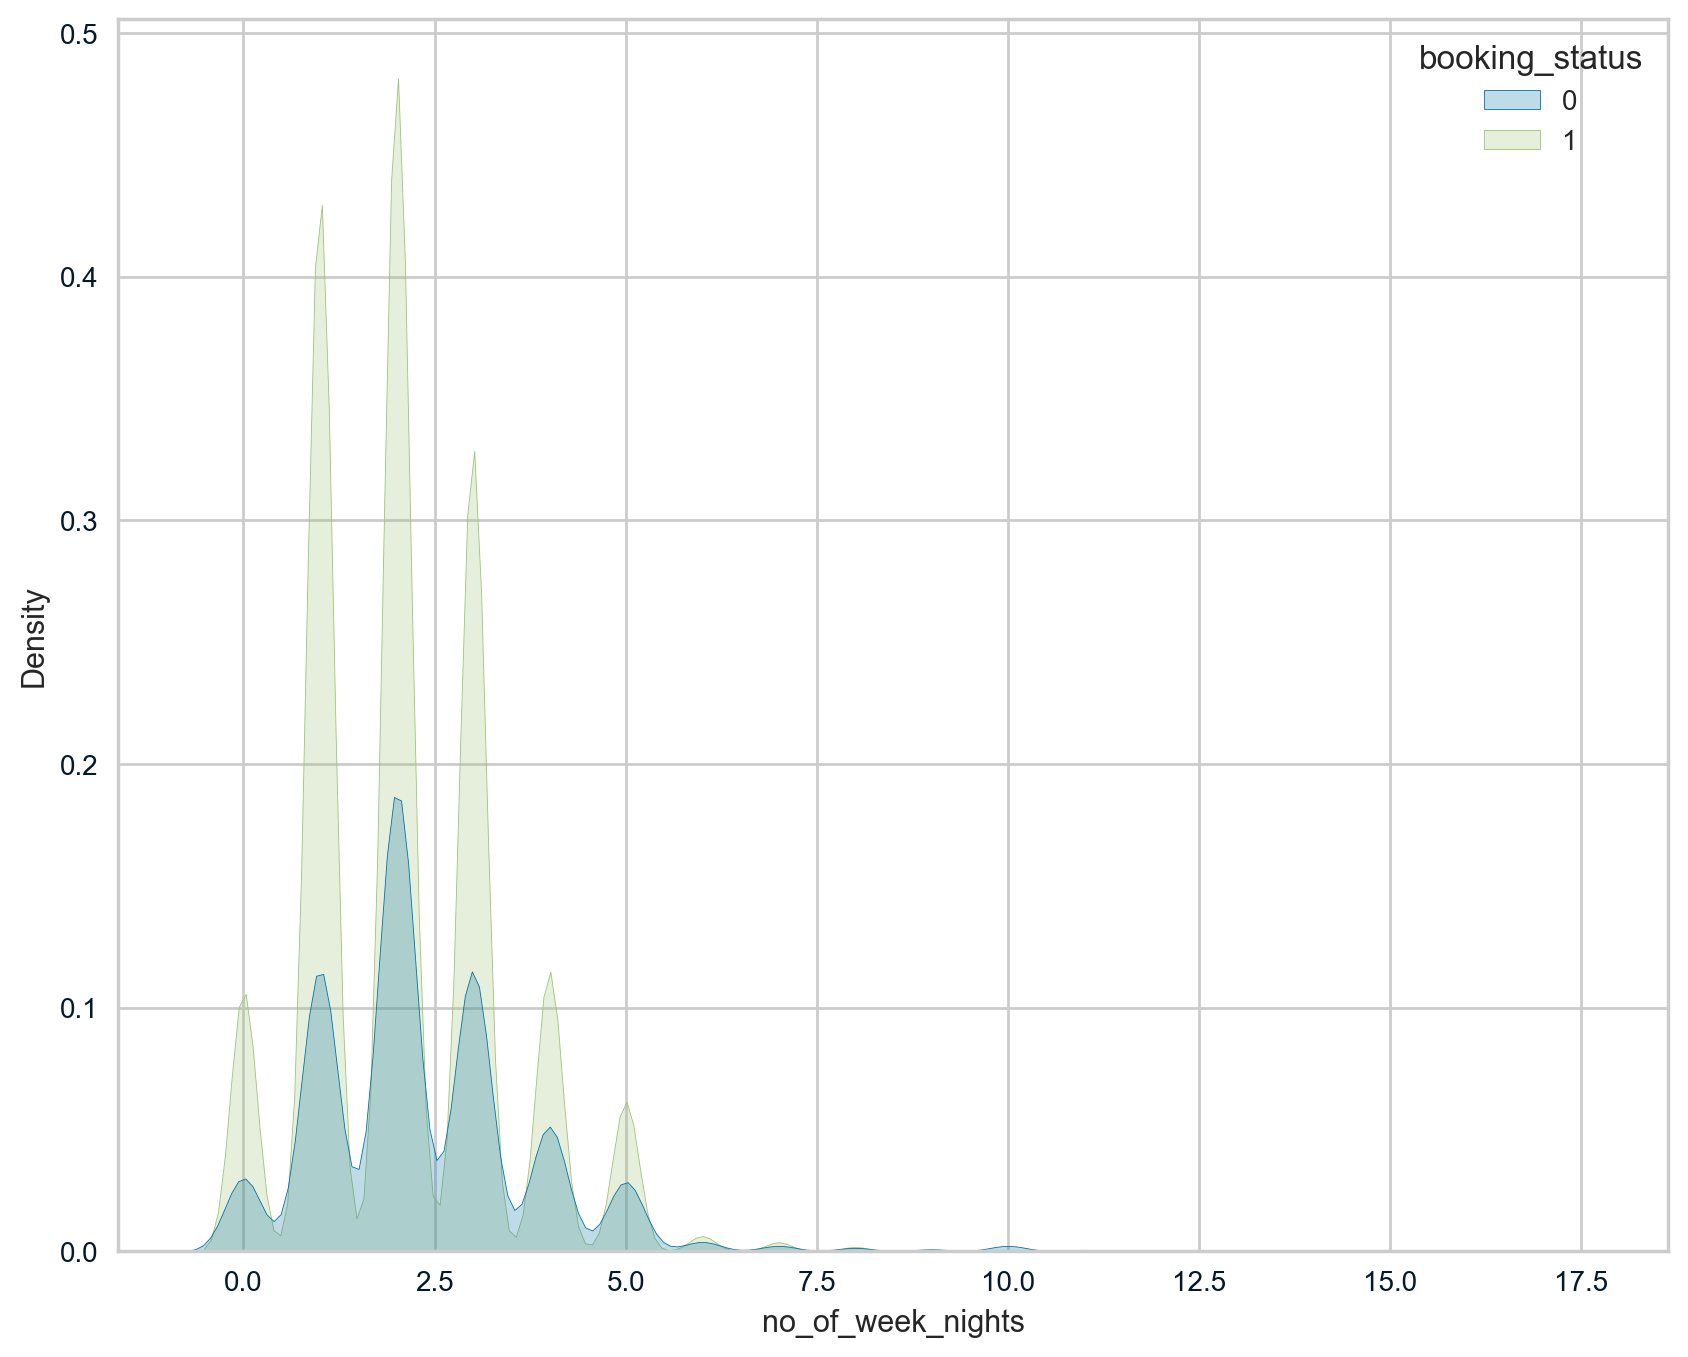

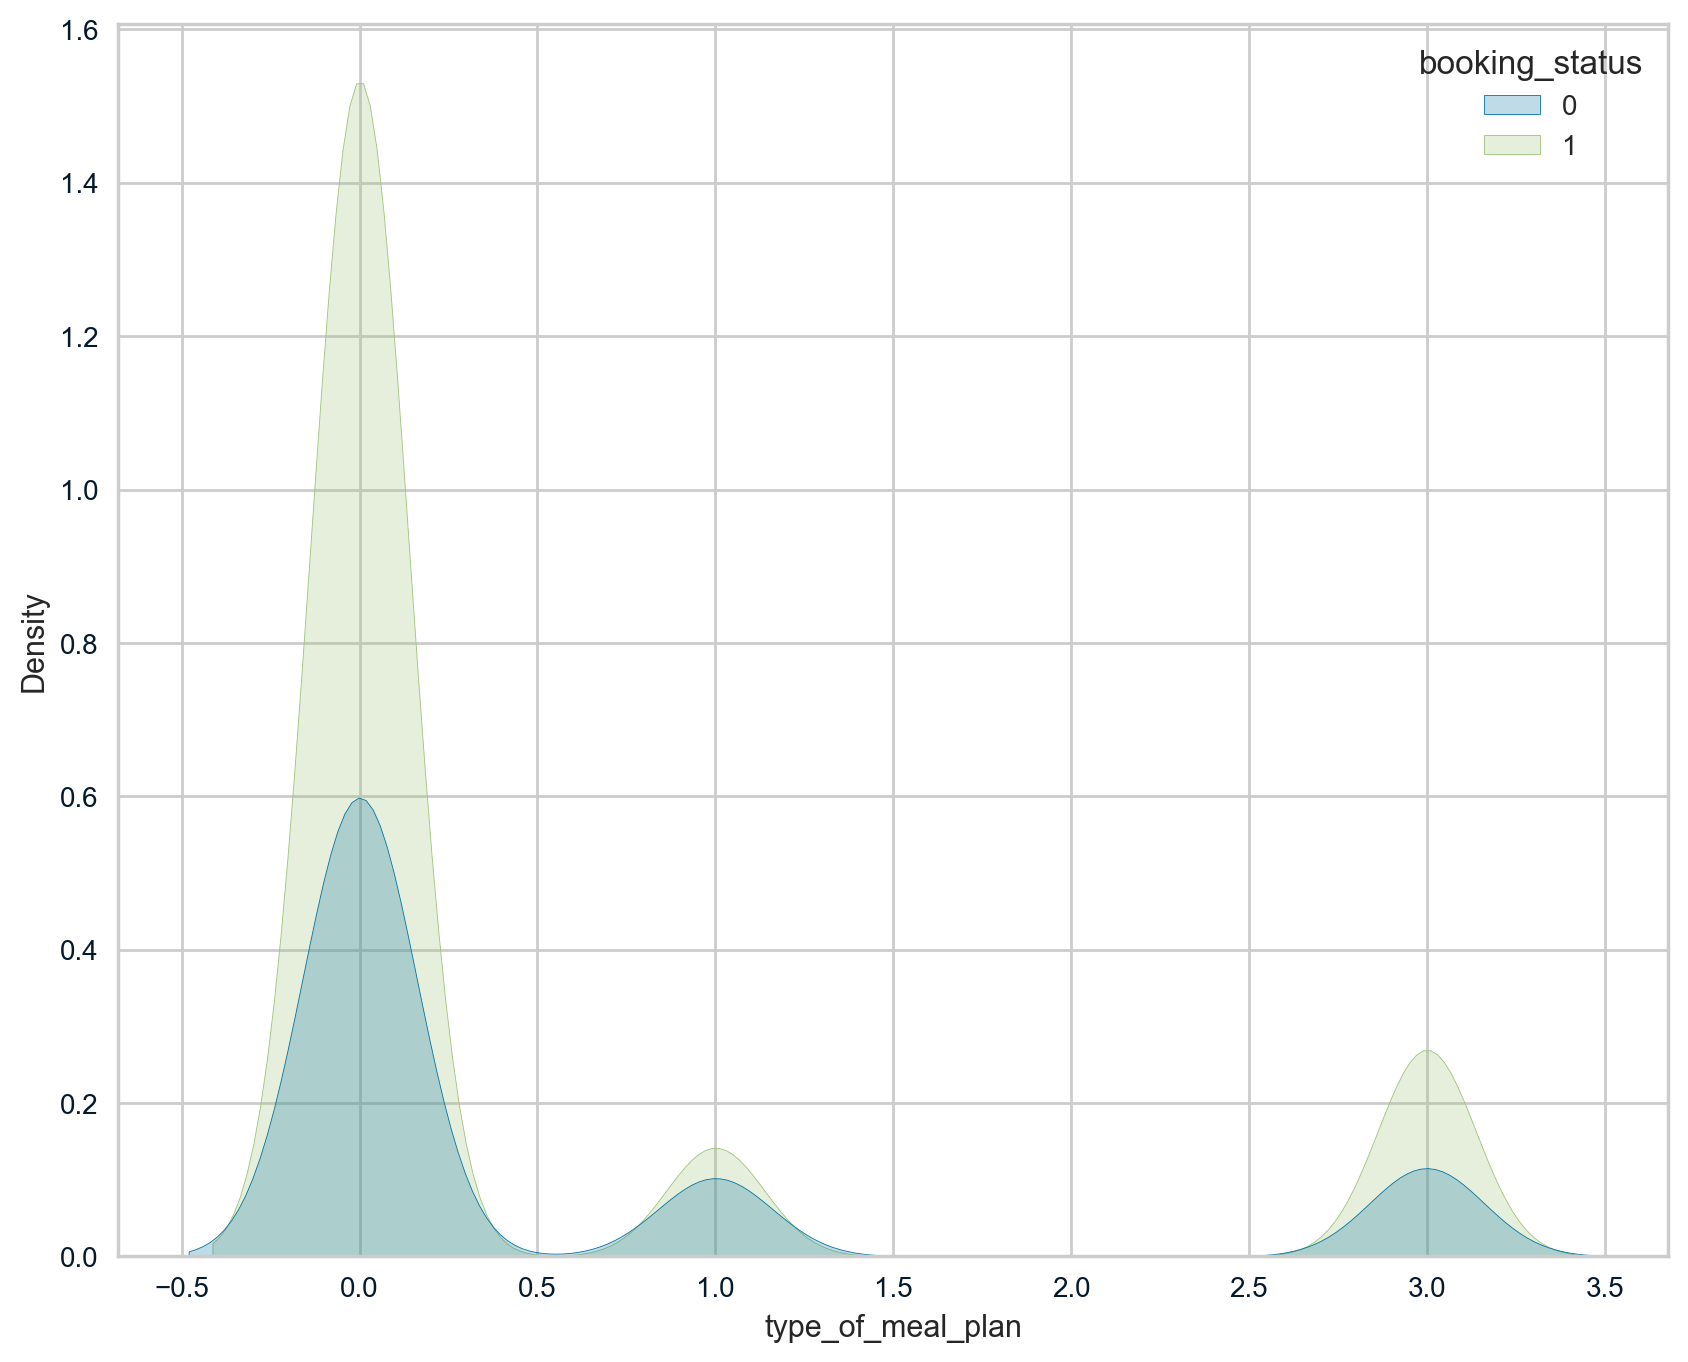

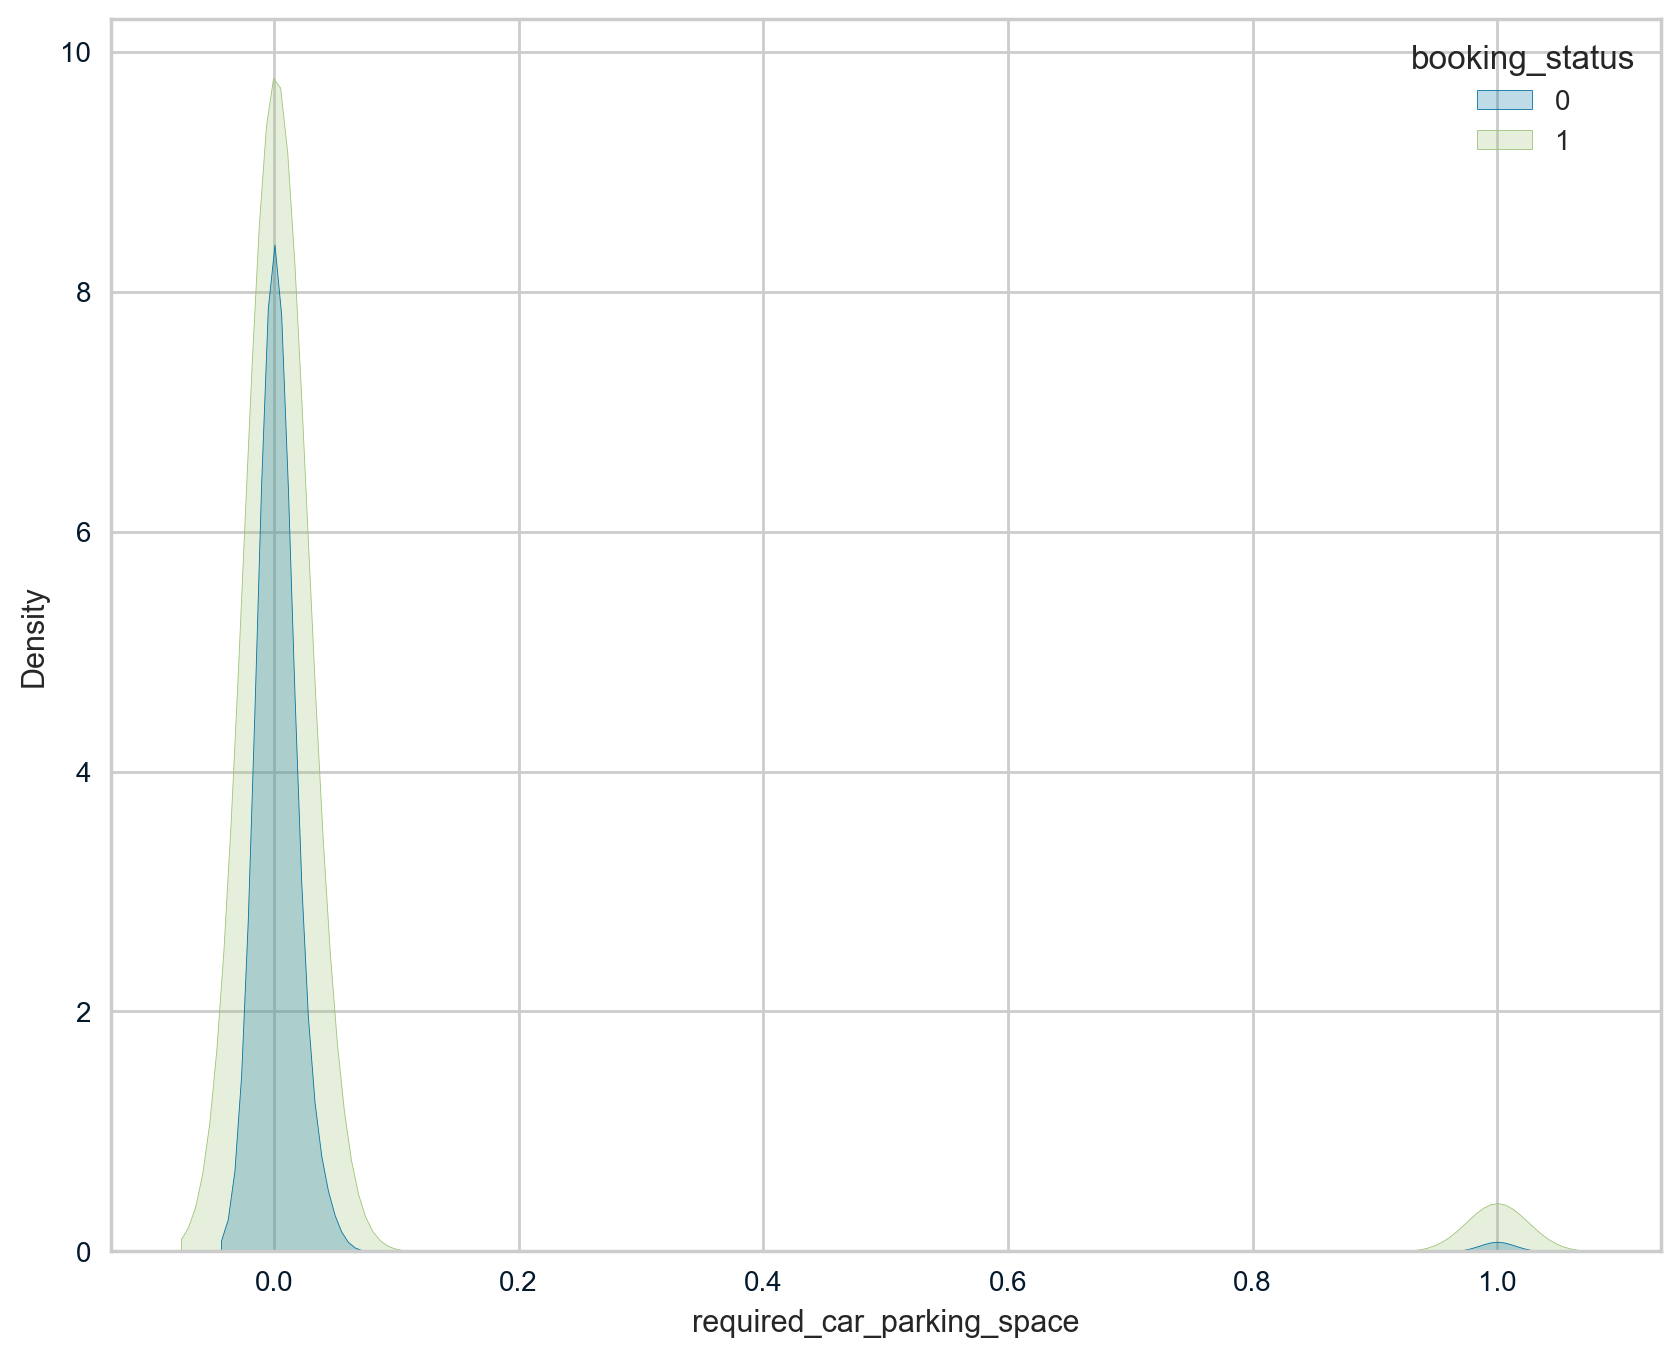

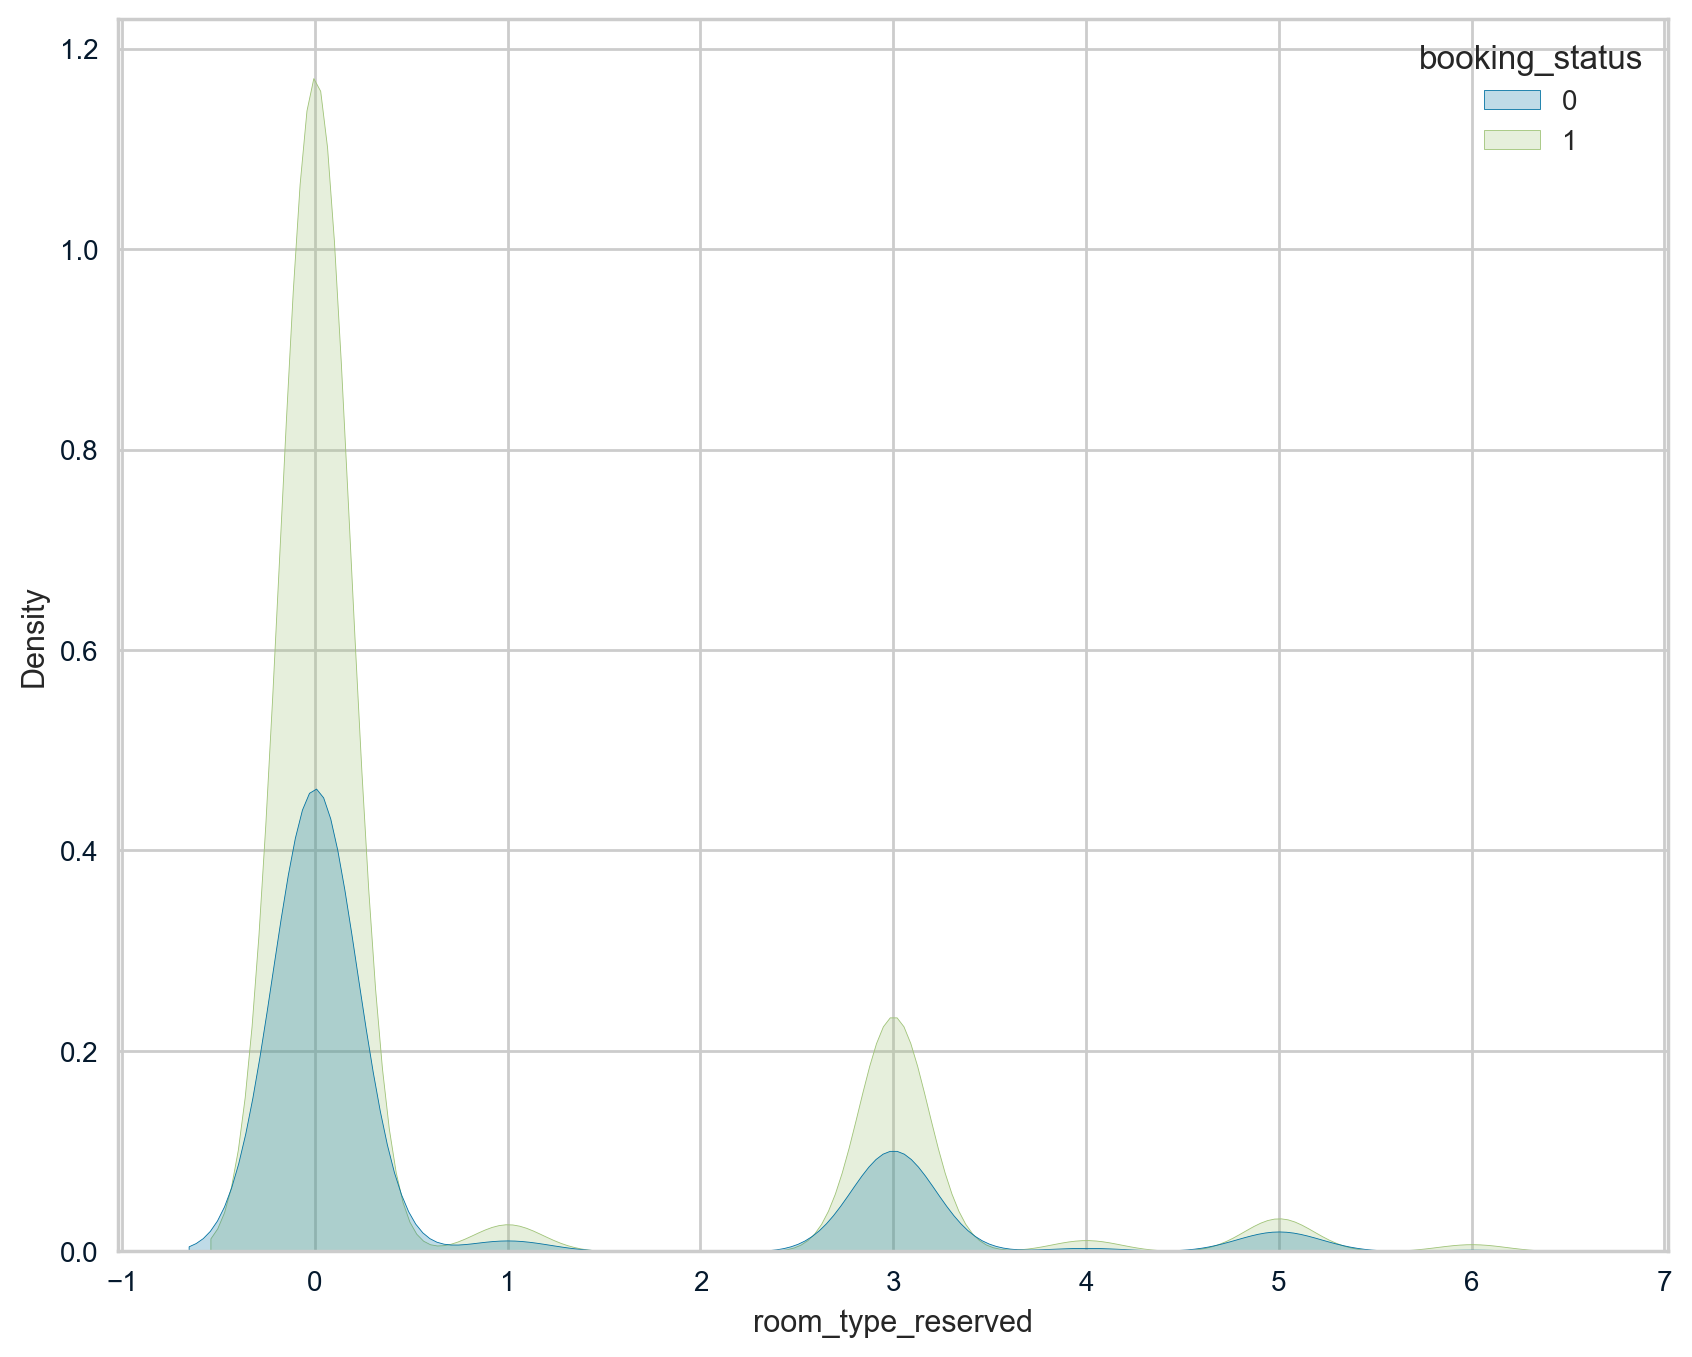

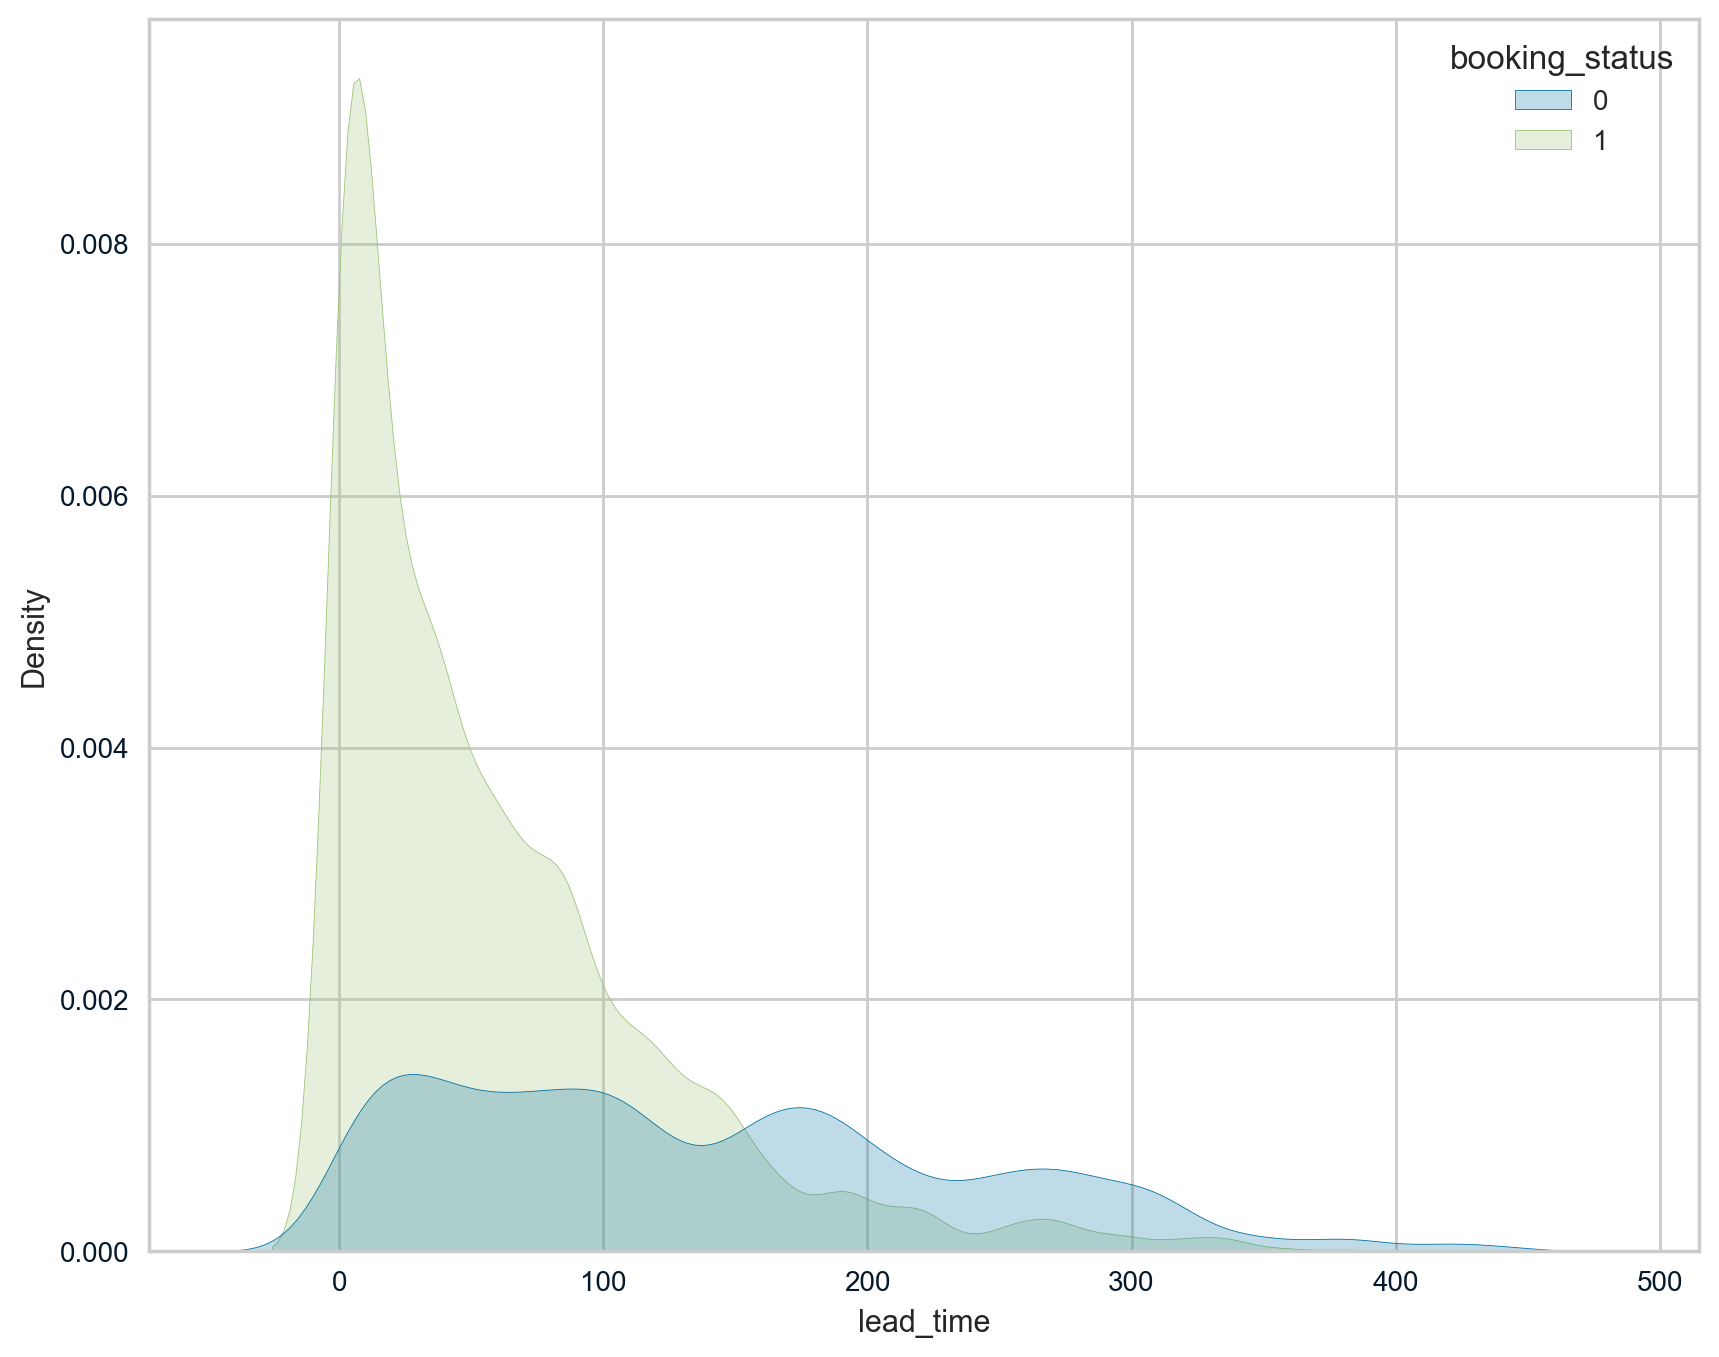

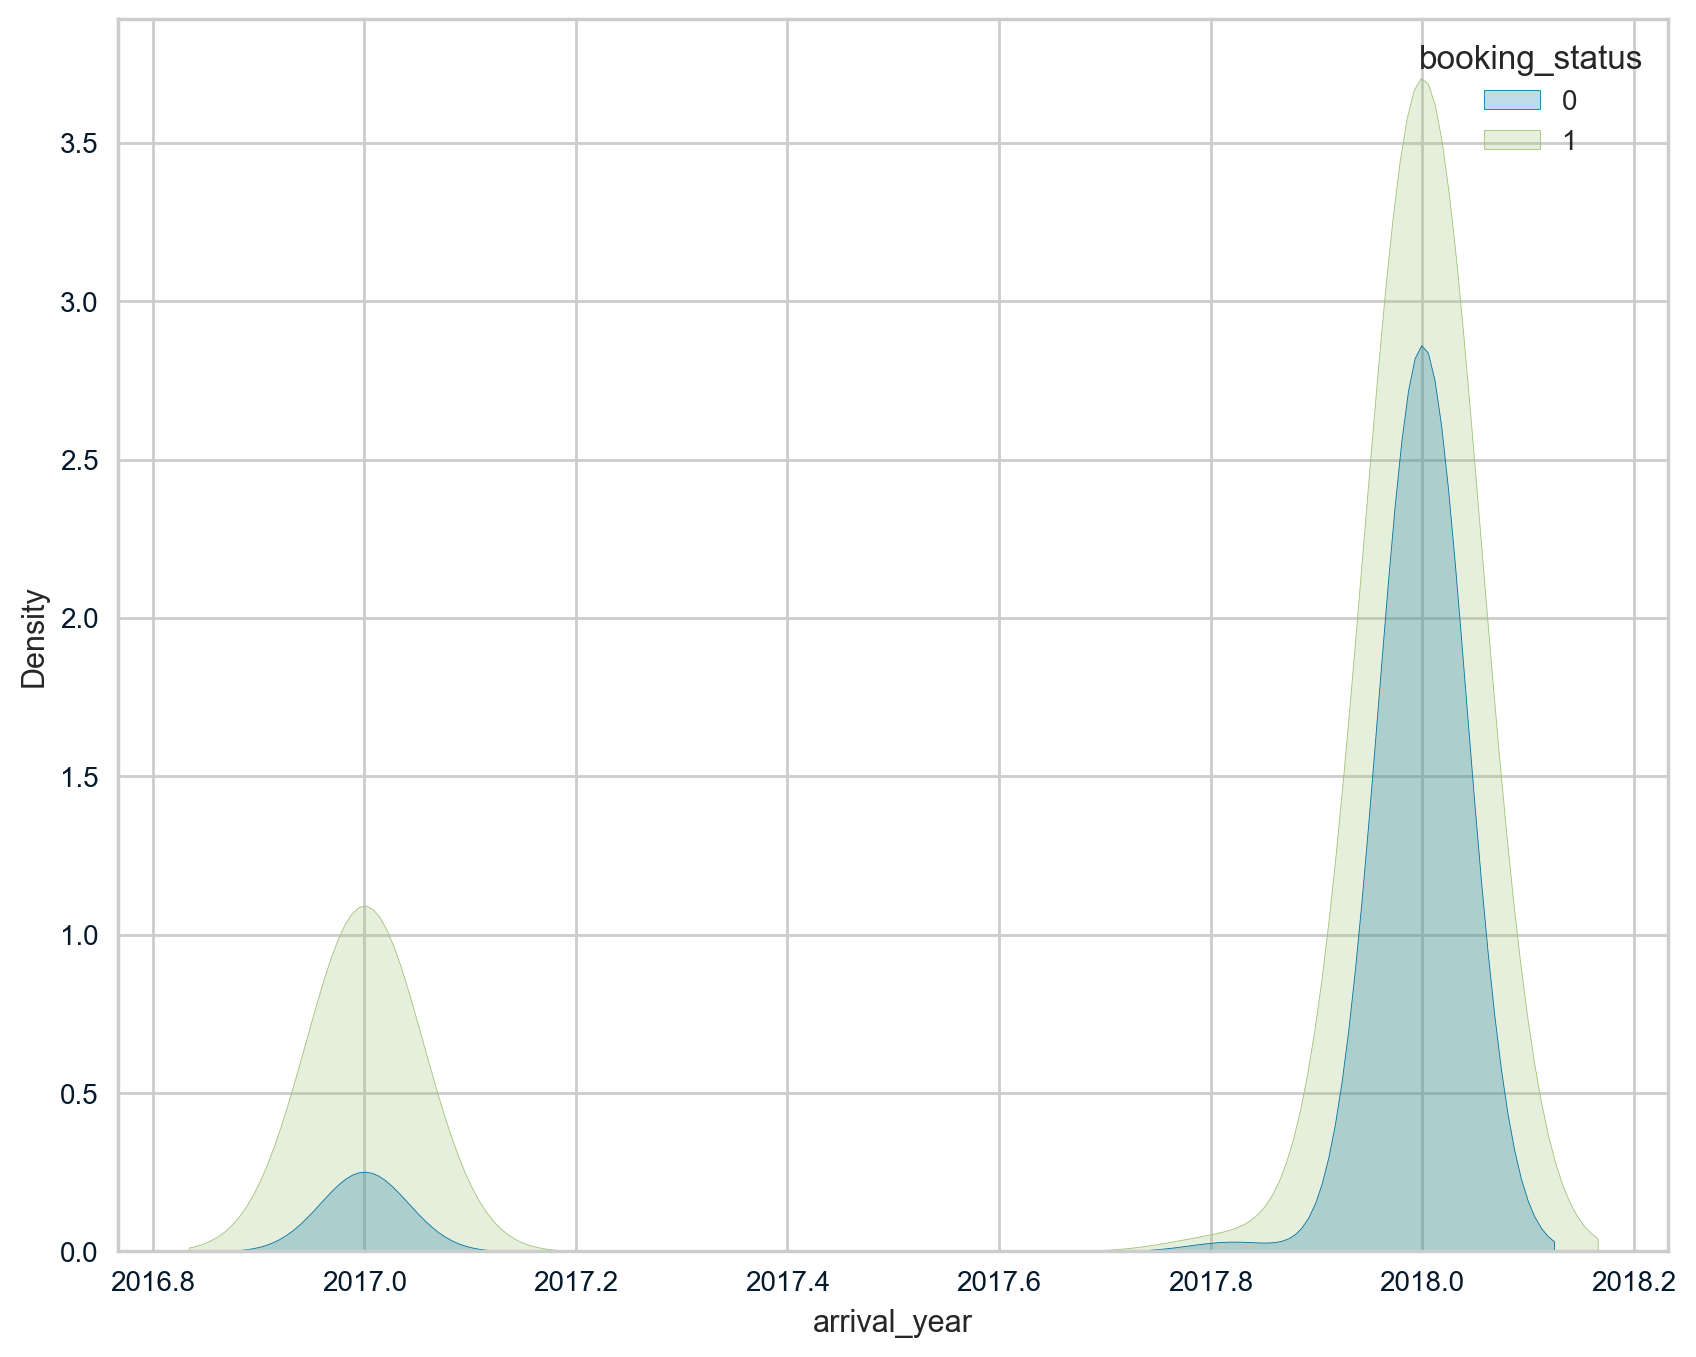

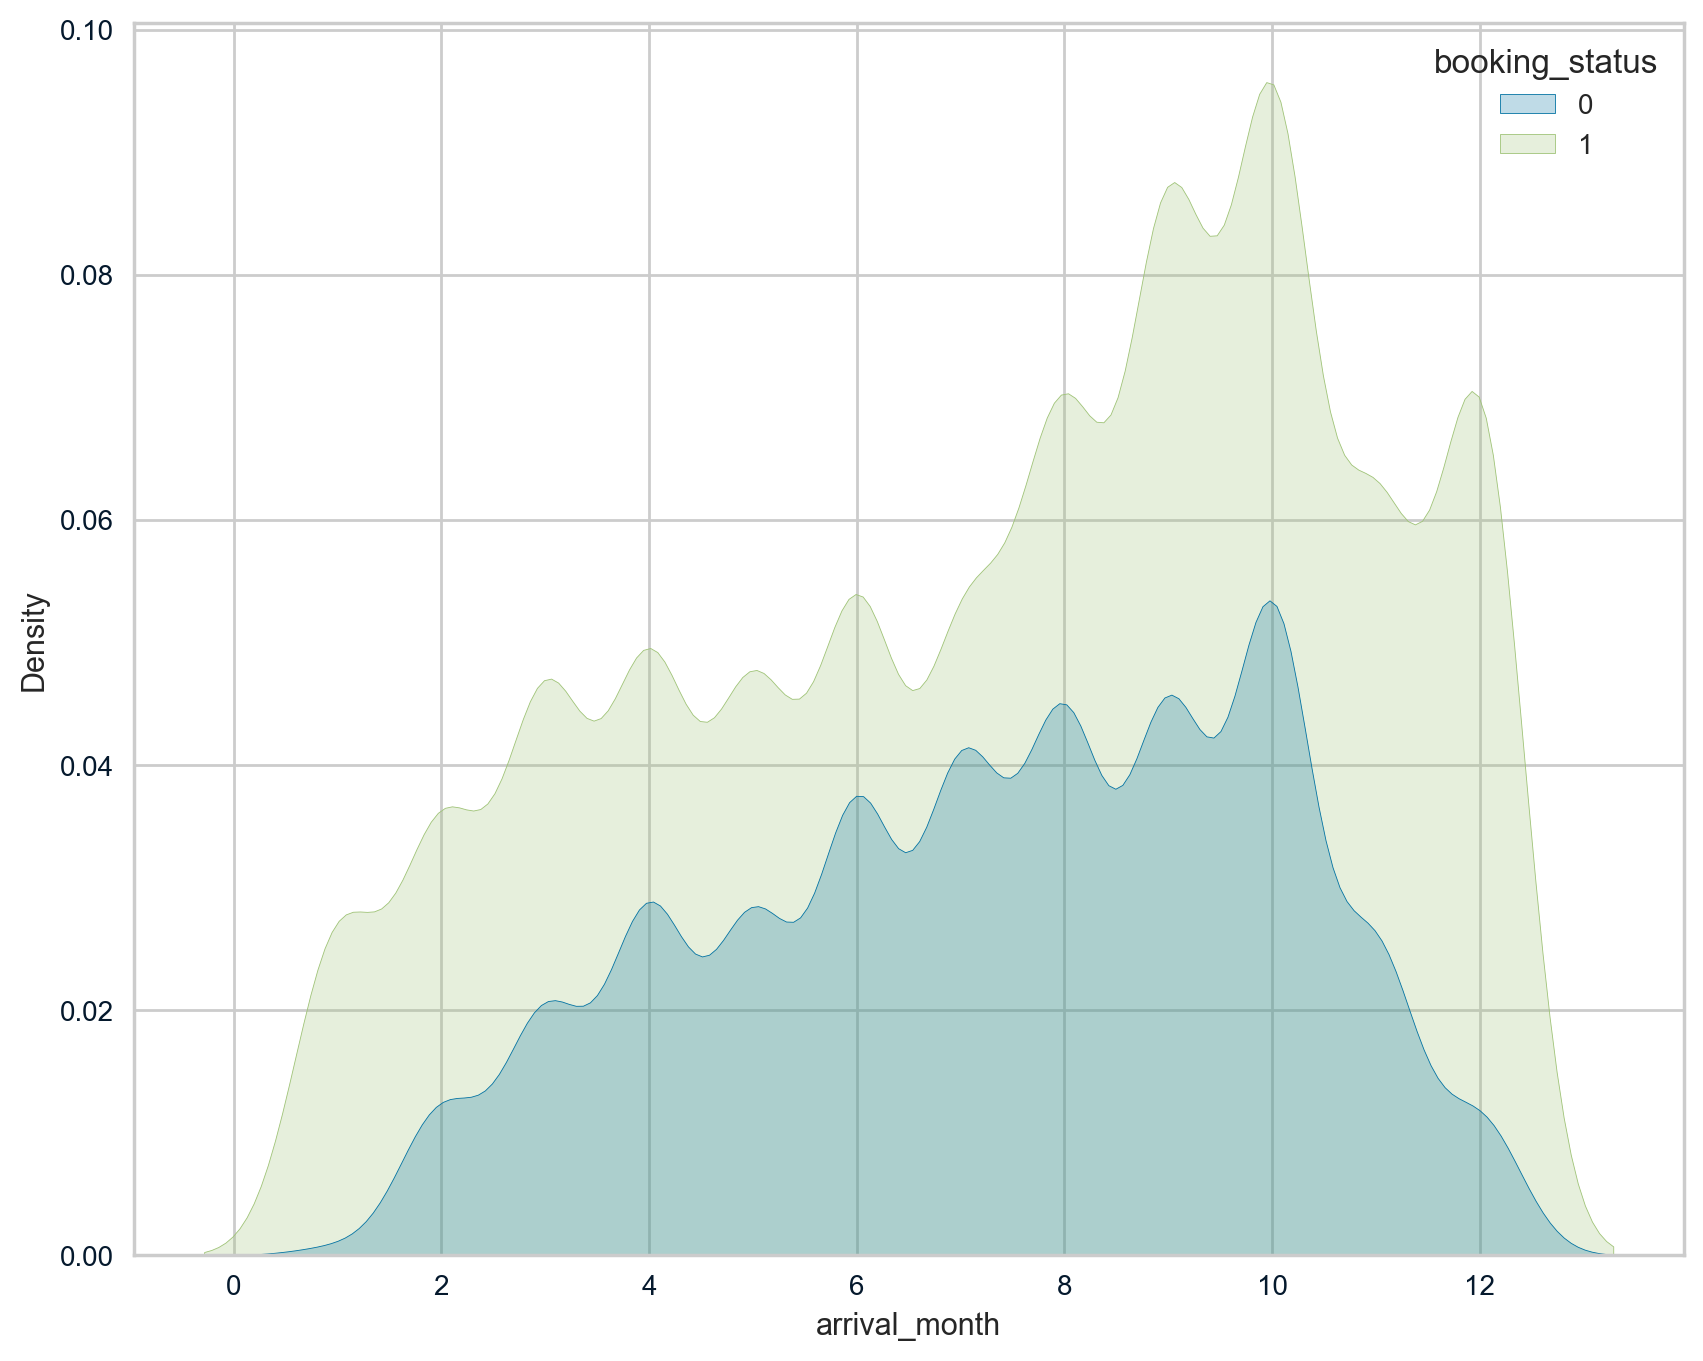

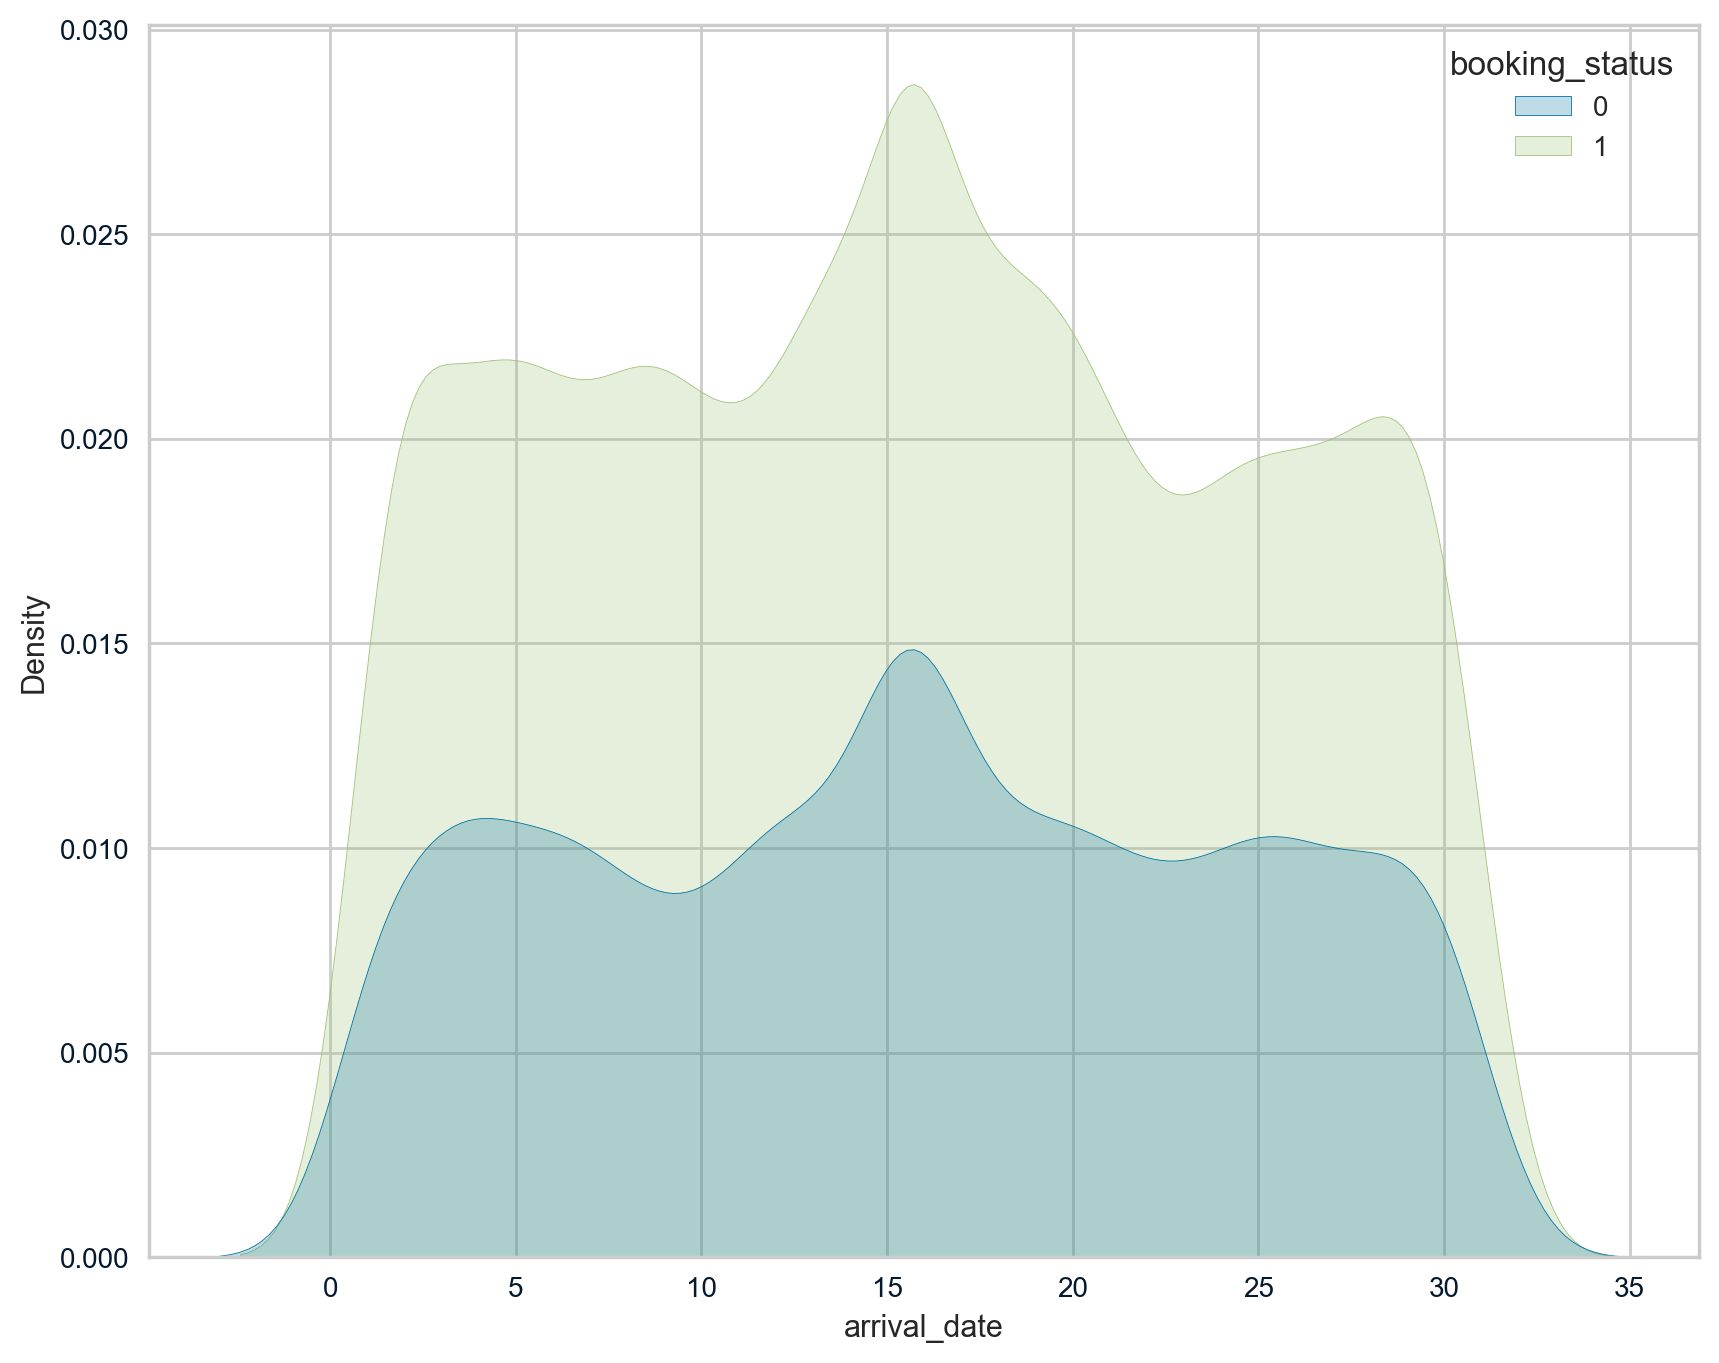

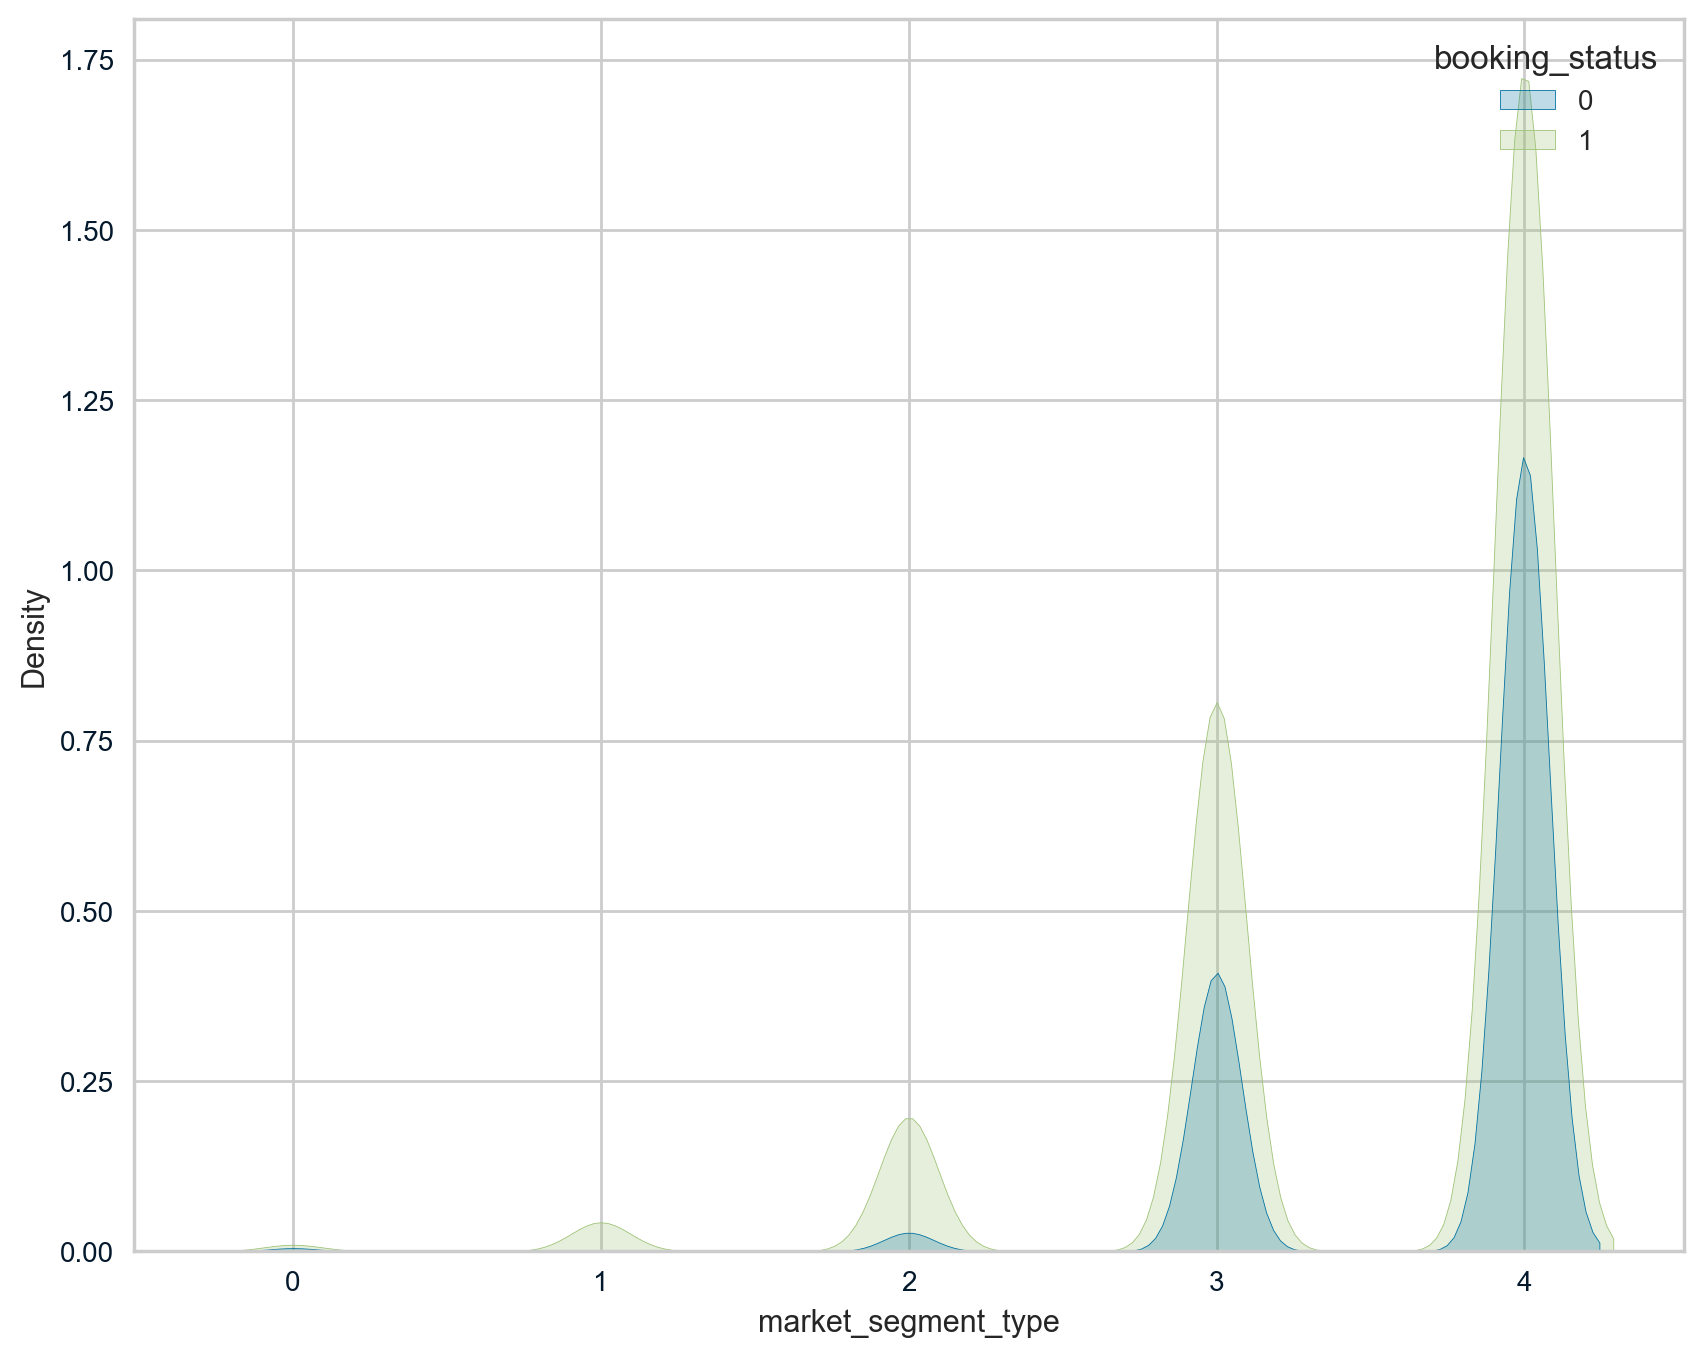

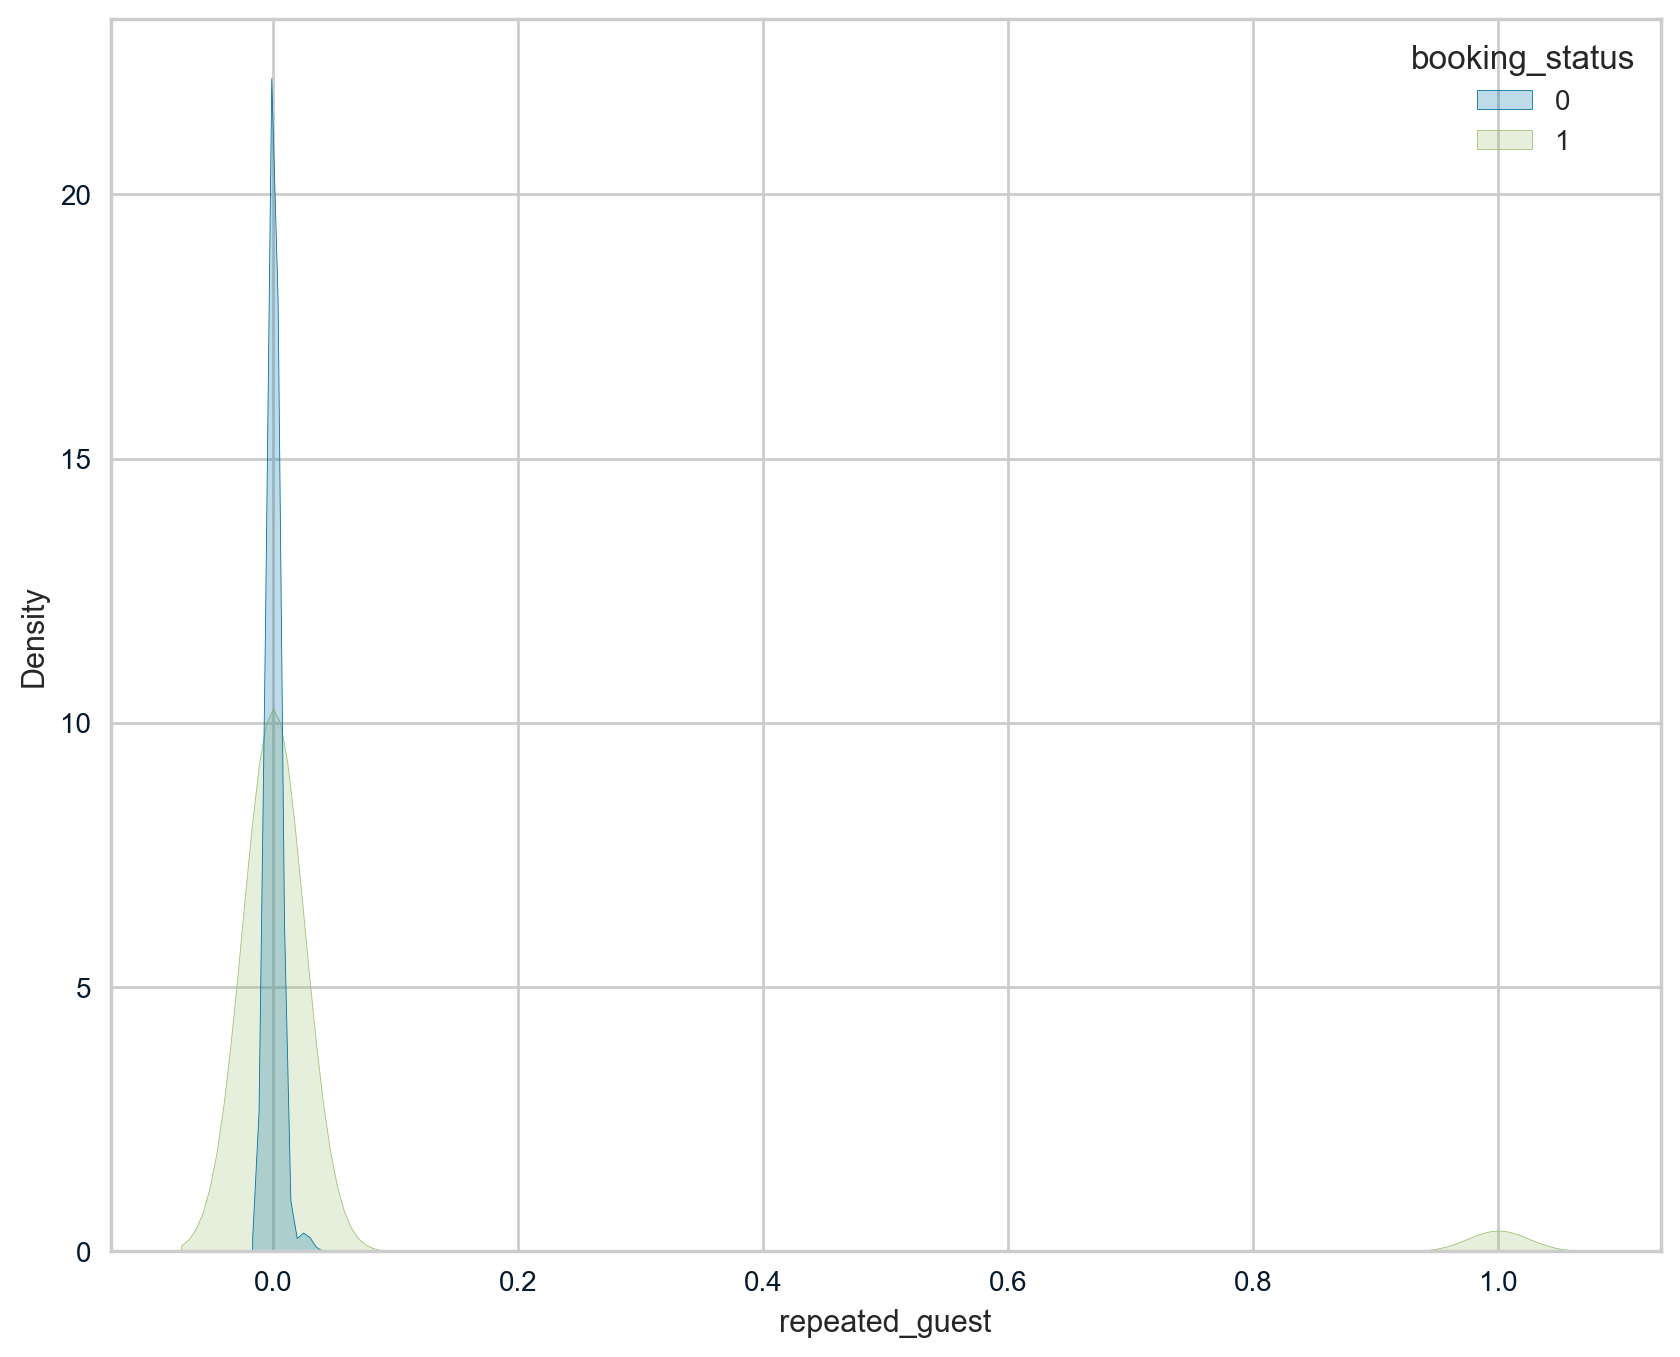

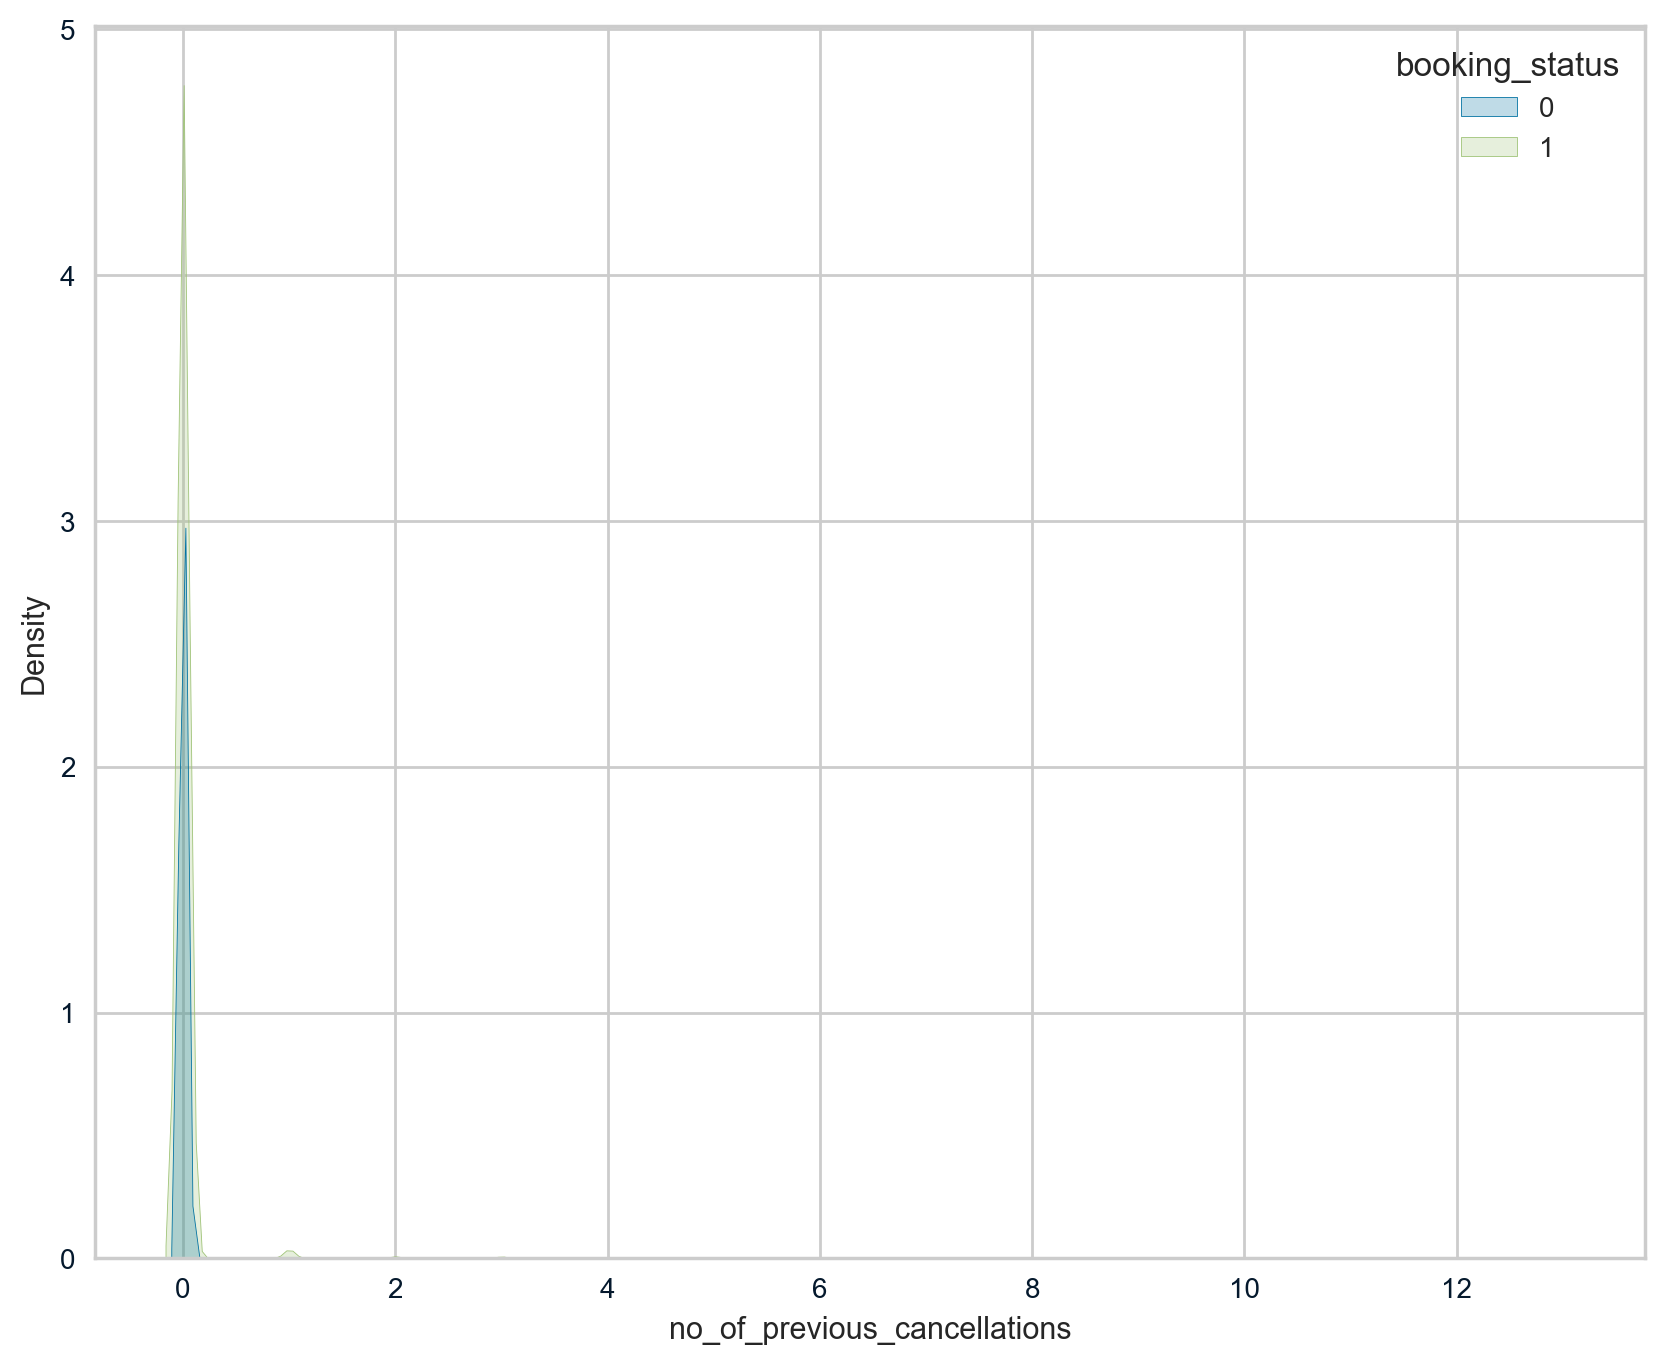

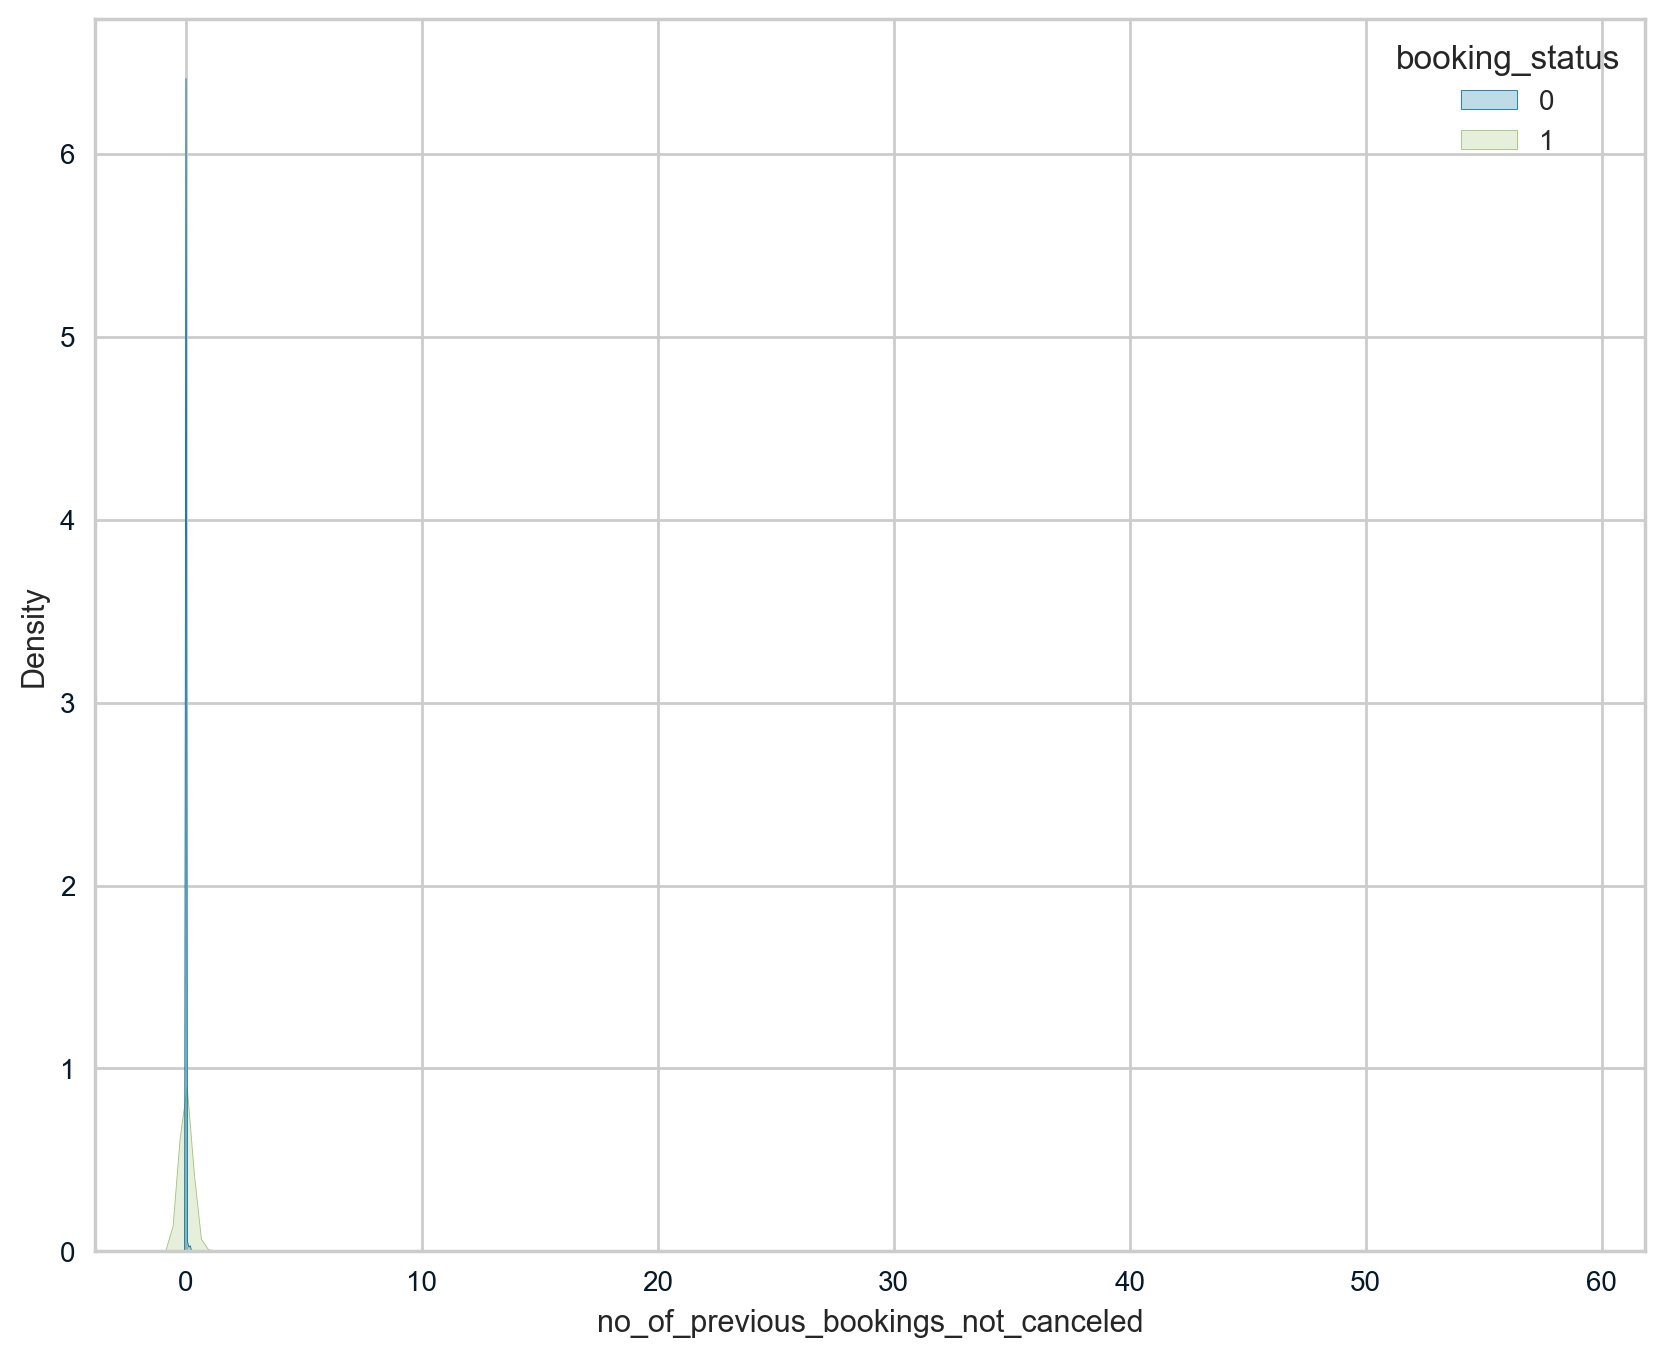

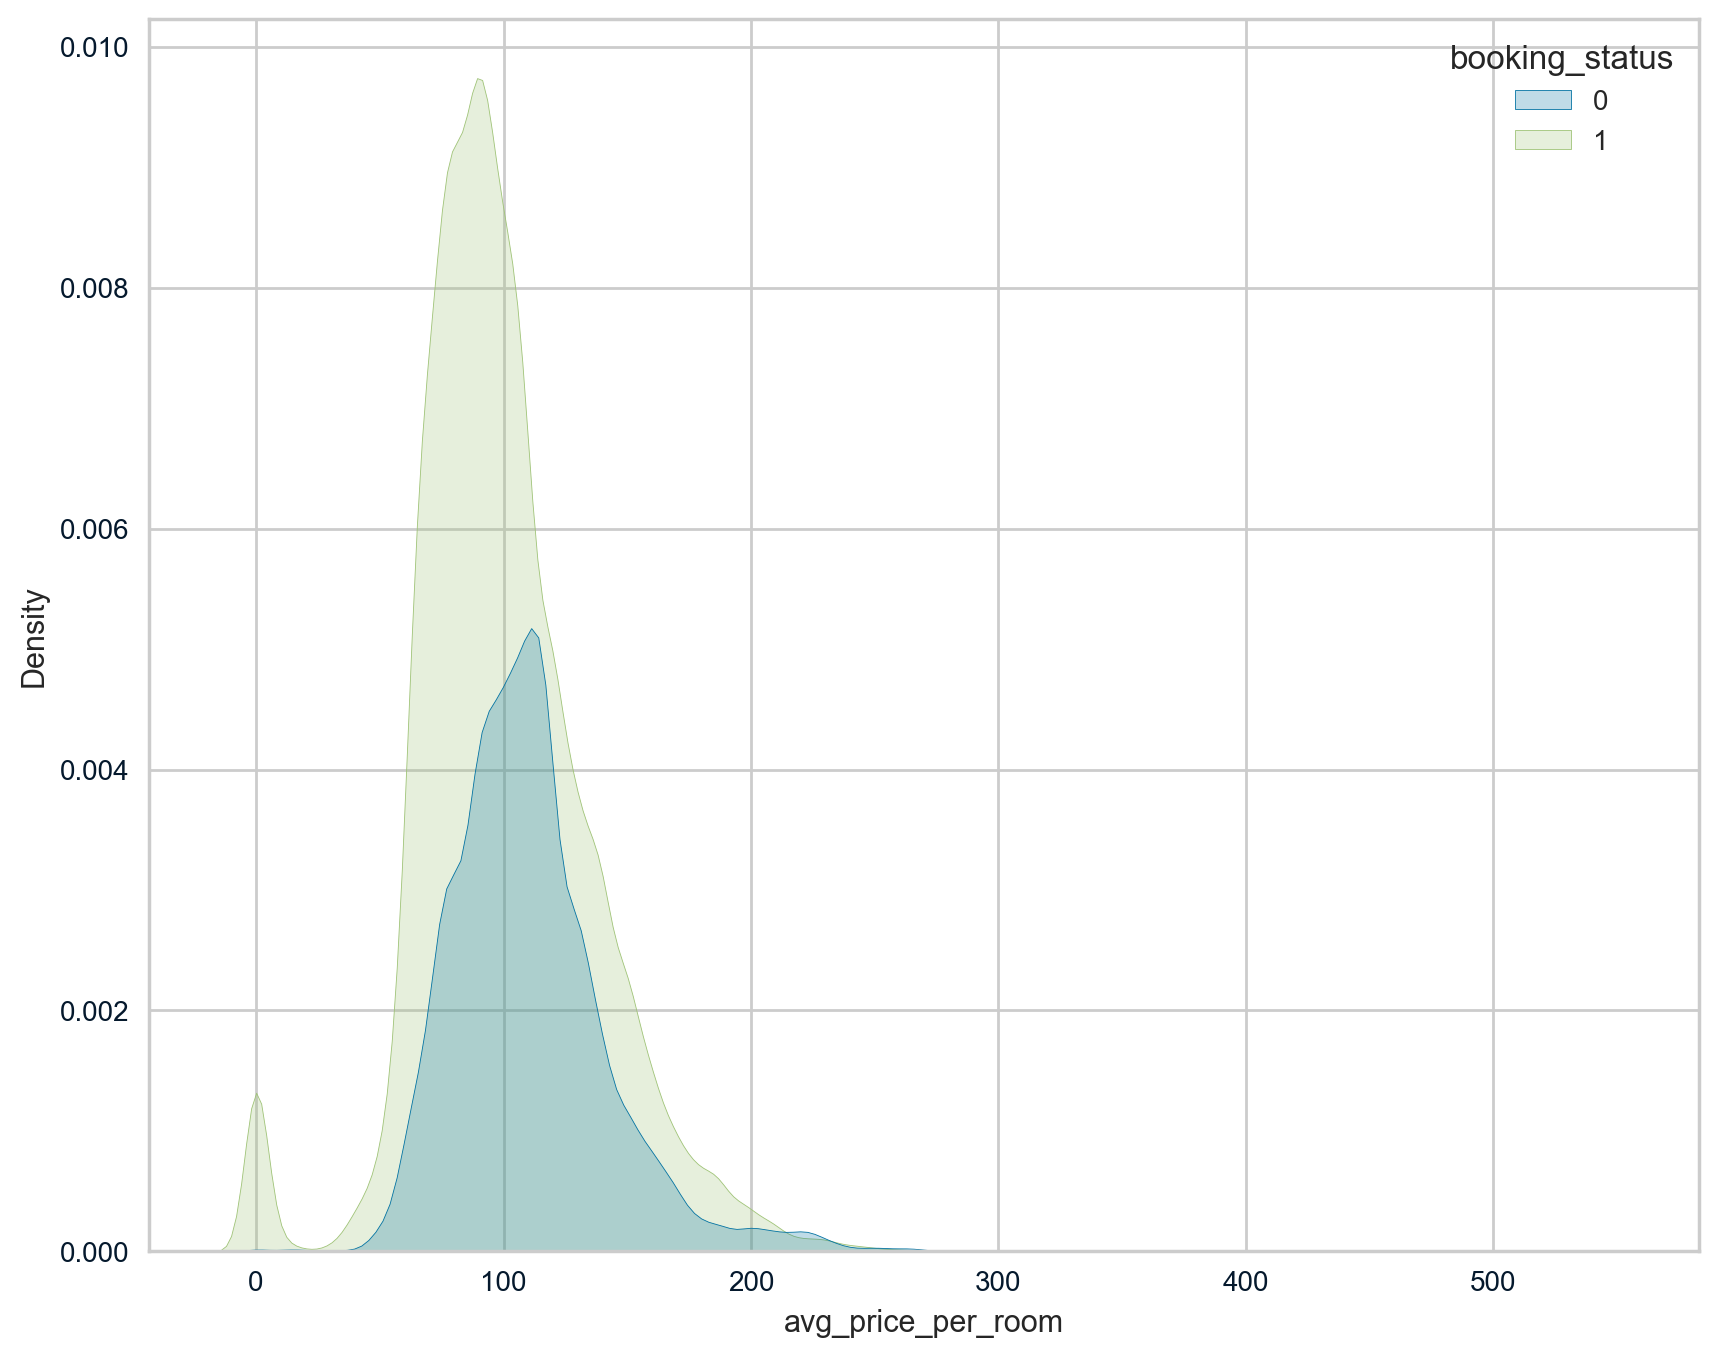

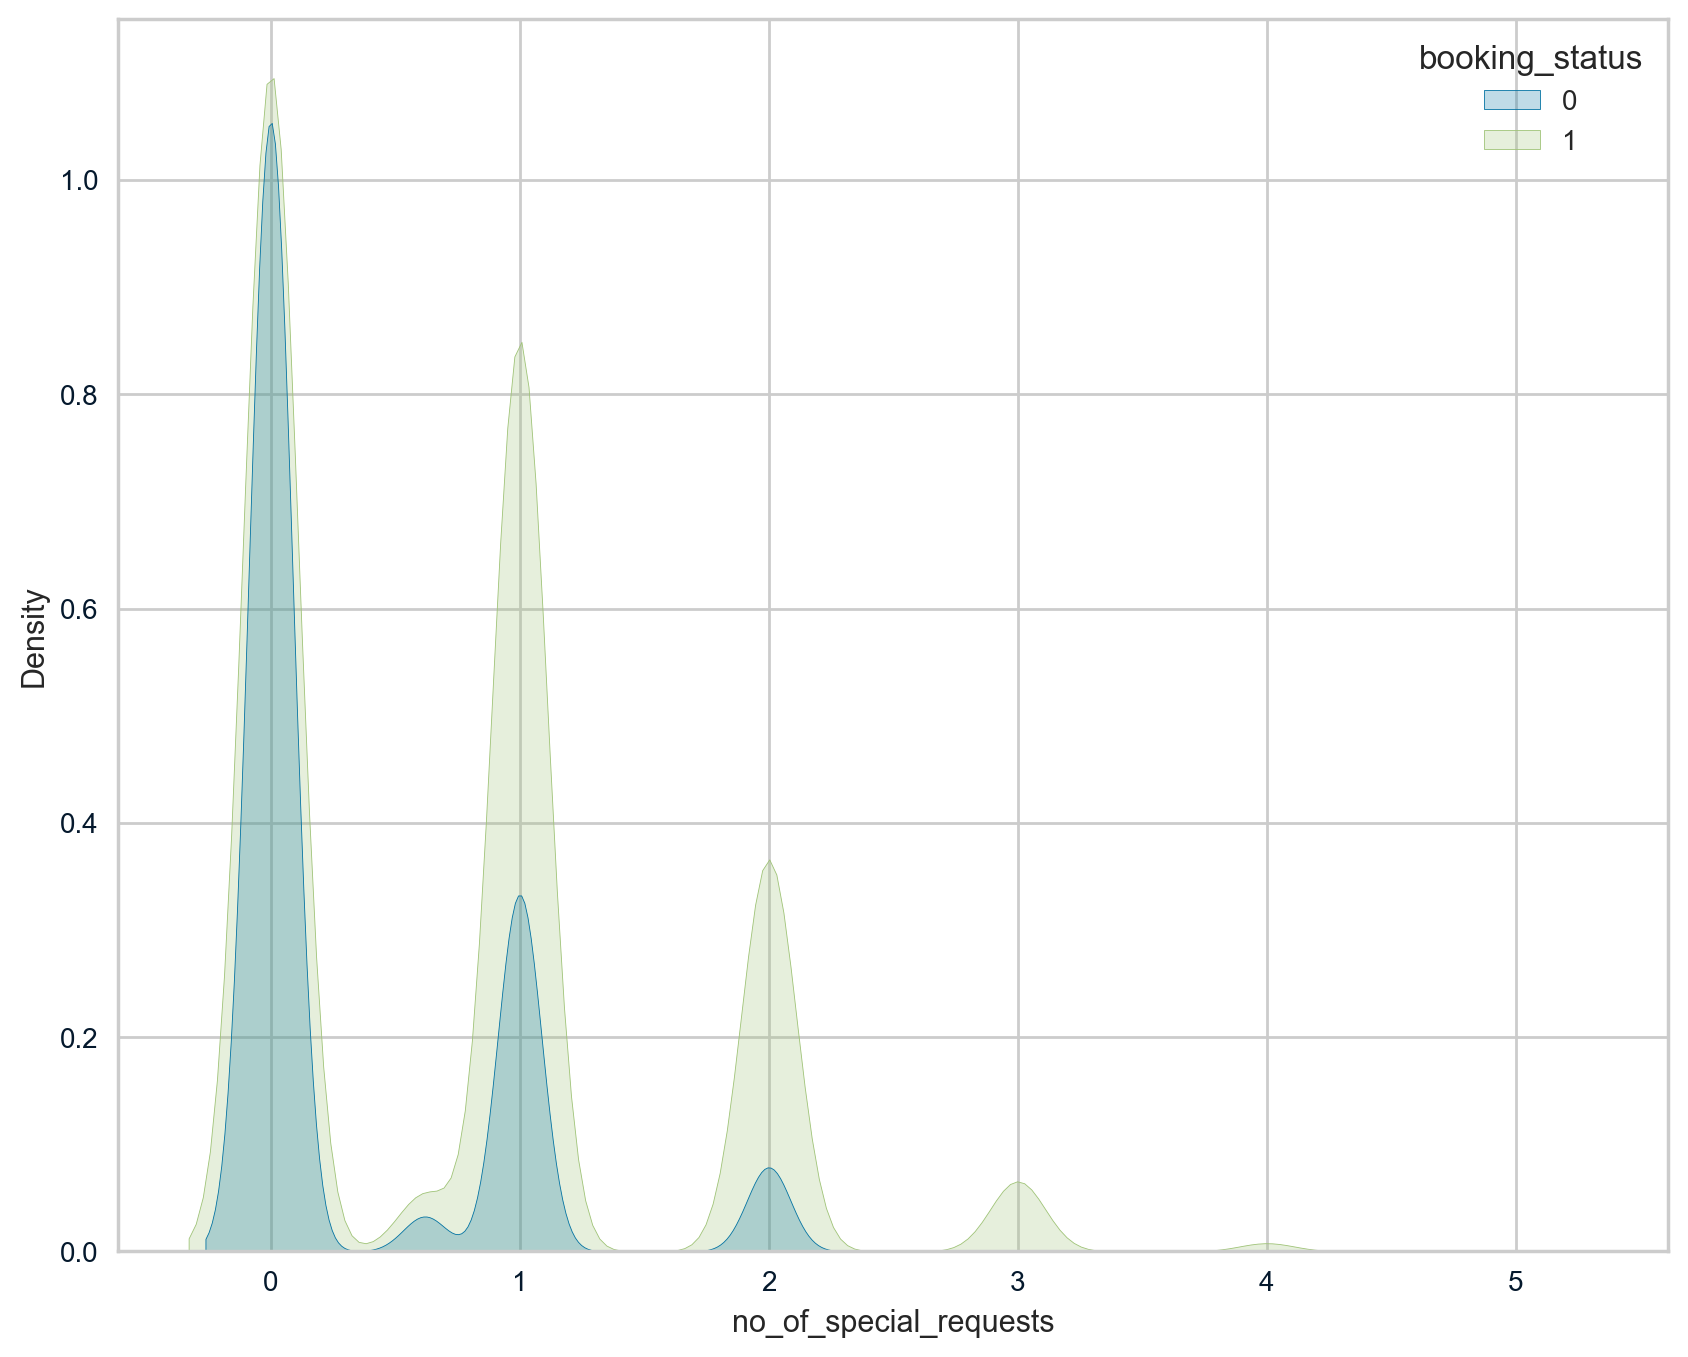

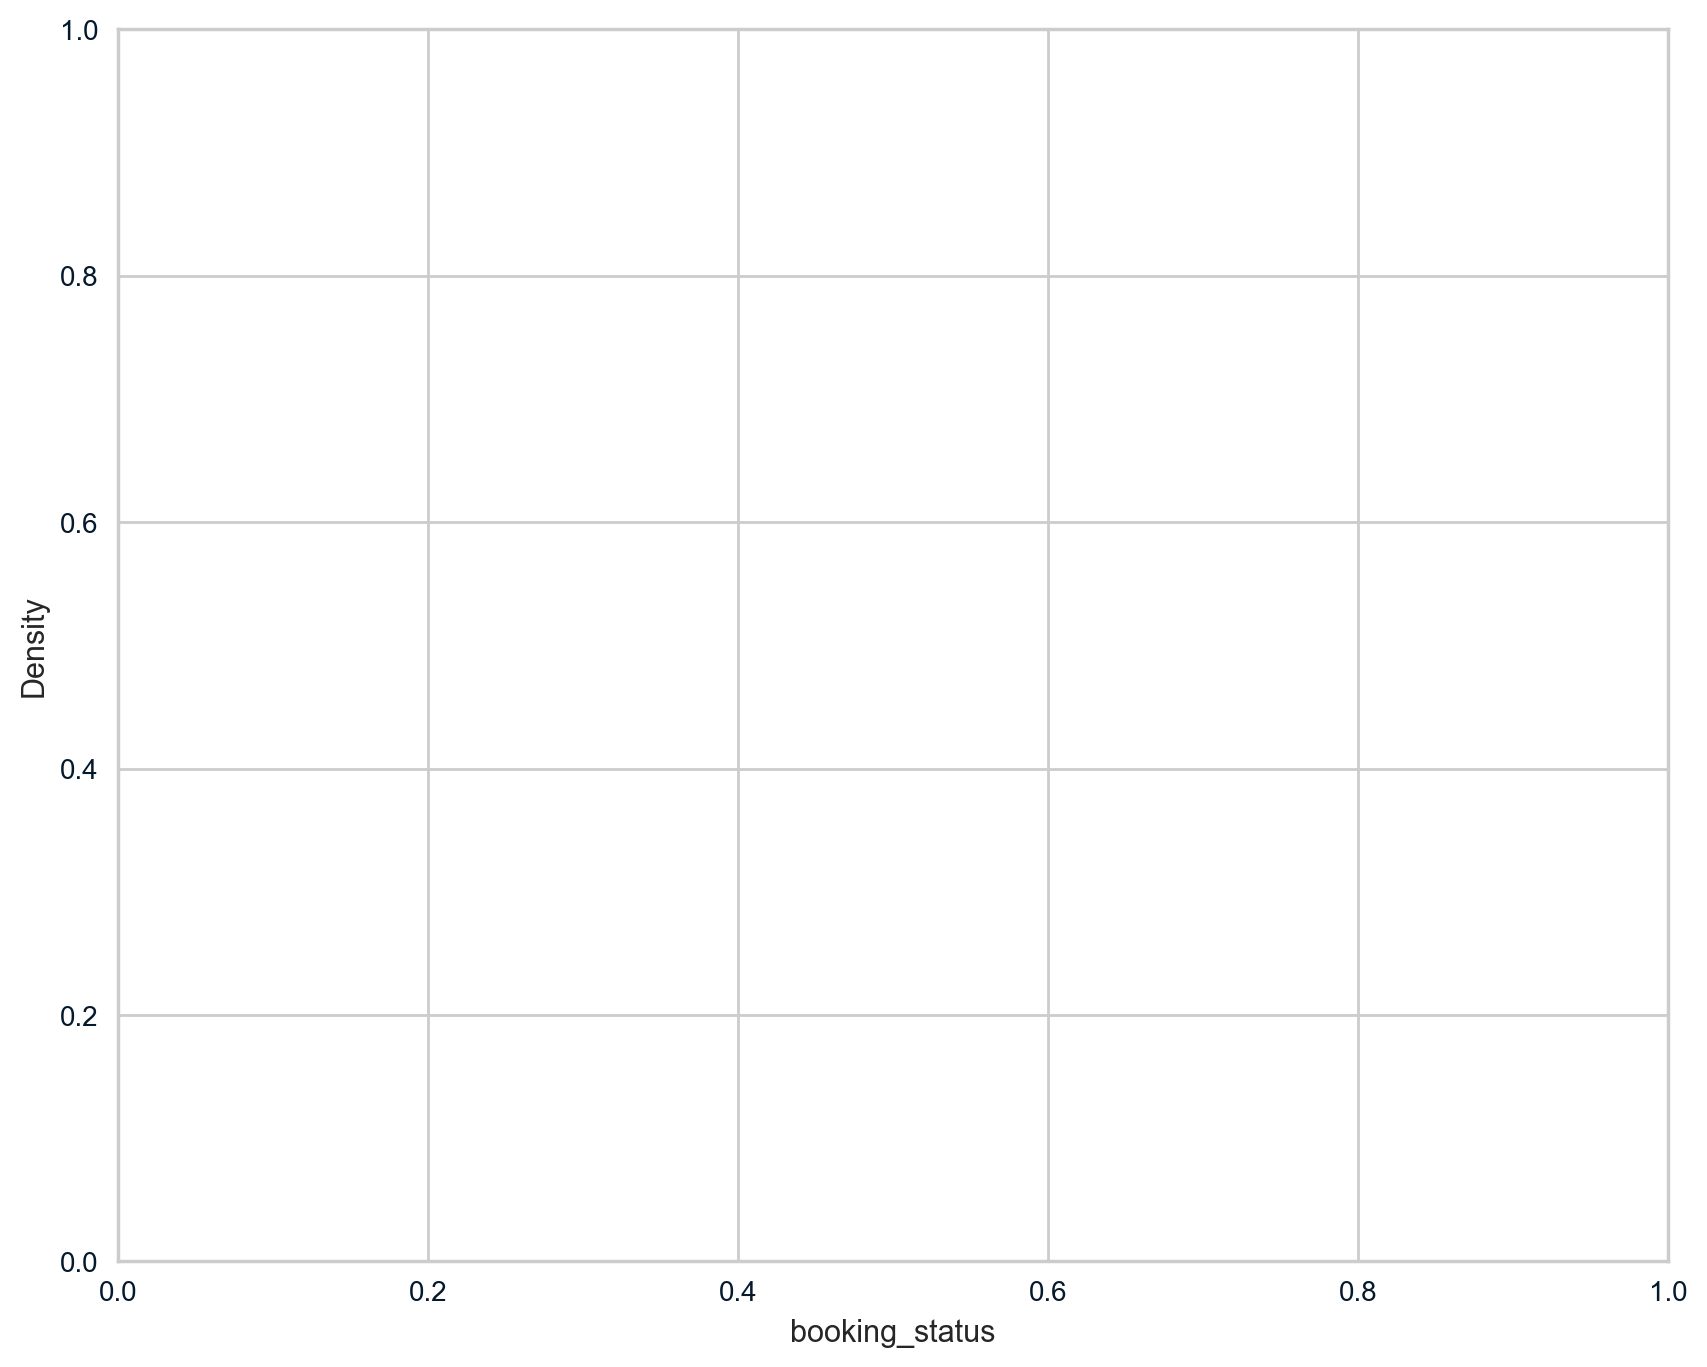

In [60]:
import warnings
warnings.filterwarnings("ignore")

for col in numerical_col:
    plt.figure(figsize=(10,8))
    #sns.distplot(df.loc[df.booking_status==1][col],kde_kws={'label':'Not Canceled'},color='green')
    #sns.distplot(df.loc[df.booking_status==0][col],kde_kws={'label':'Canceled'},color='red')
    sns.kdeplot(x=col,hue='booking_status',shade=True,data=hotels,)

plt.legend(['Booking','No Booking'])



<AxesSubplot: title={'center': 'Variable arrival_year'}, xlabel='arrival_year', ylabel='count'>

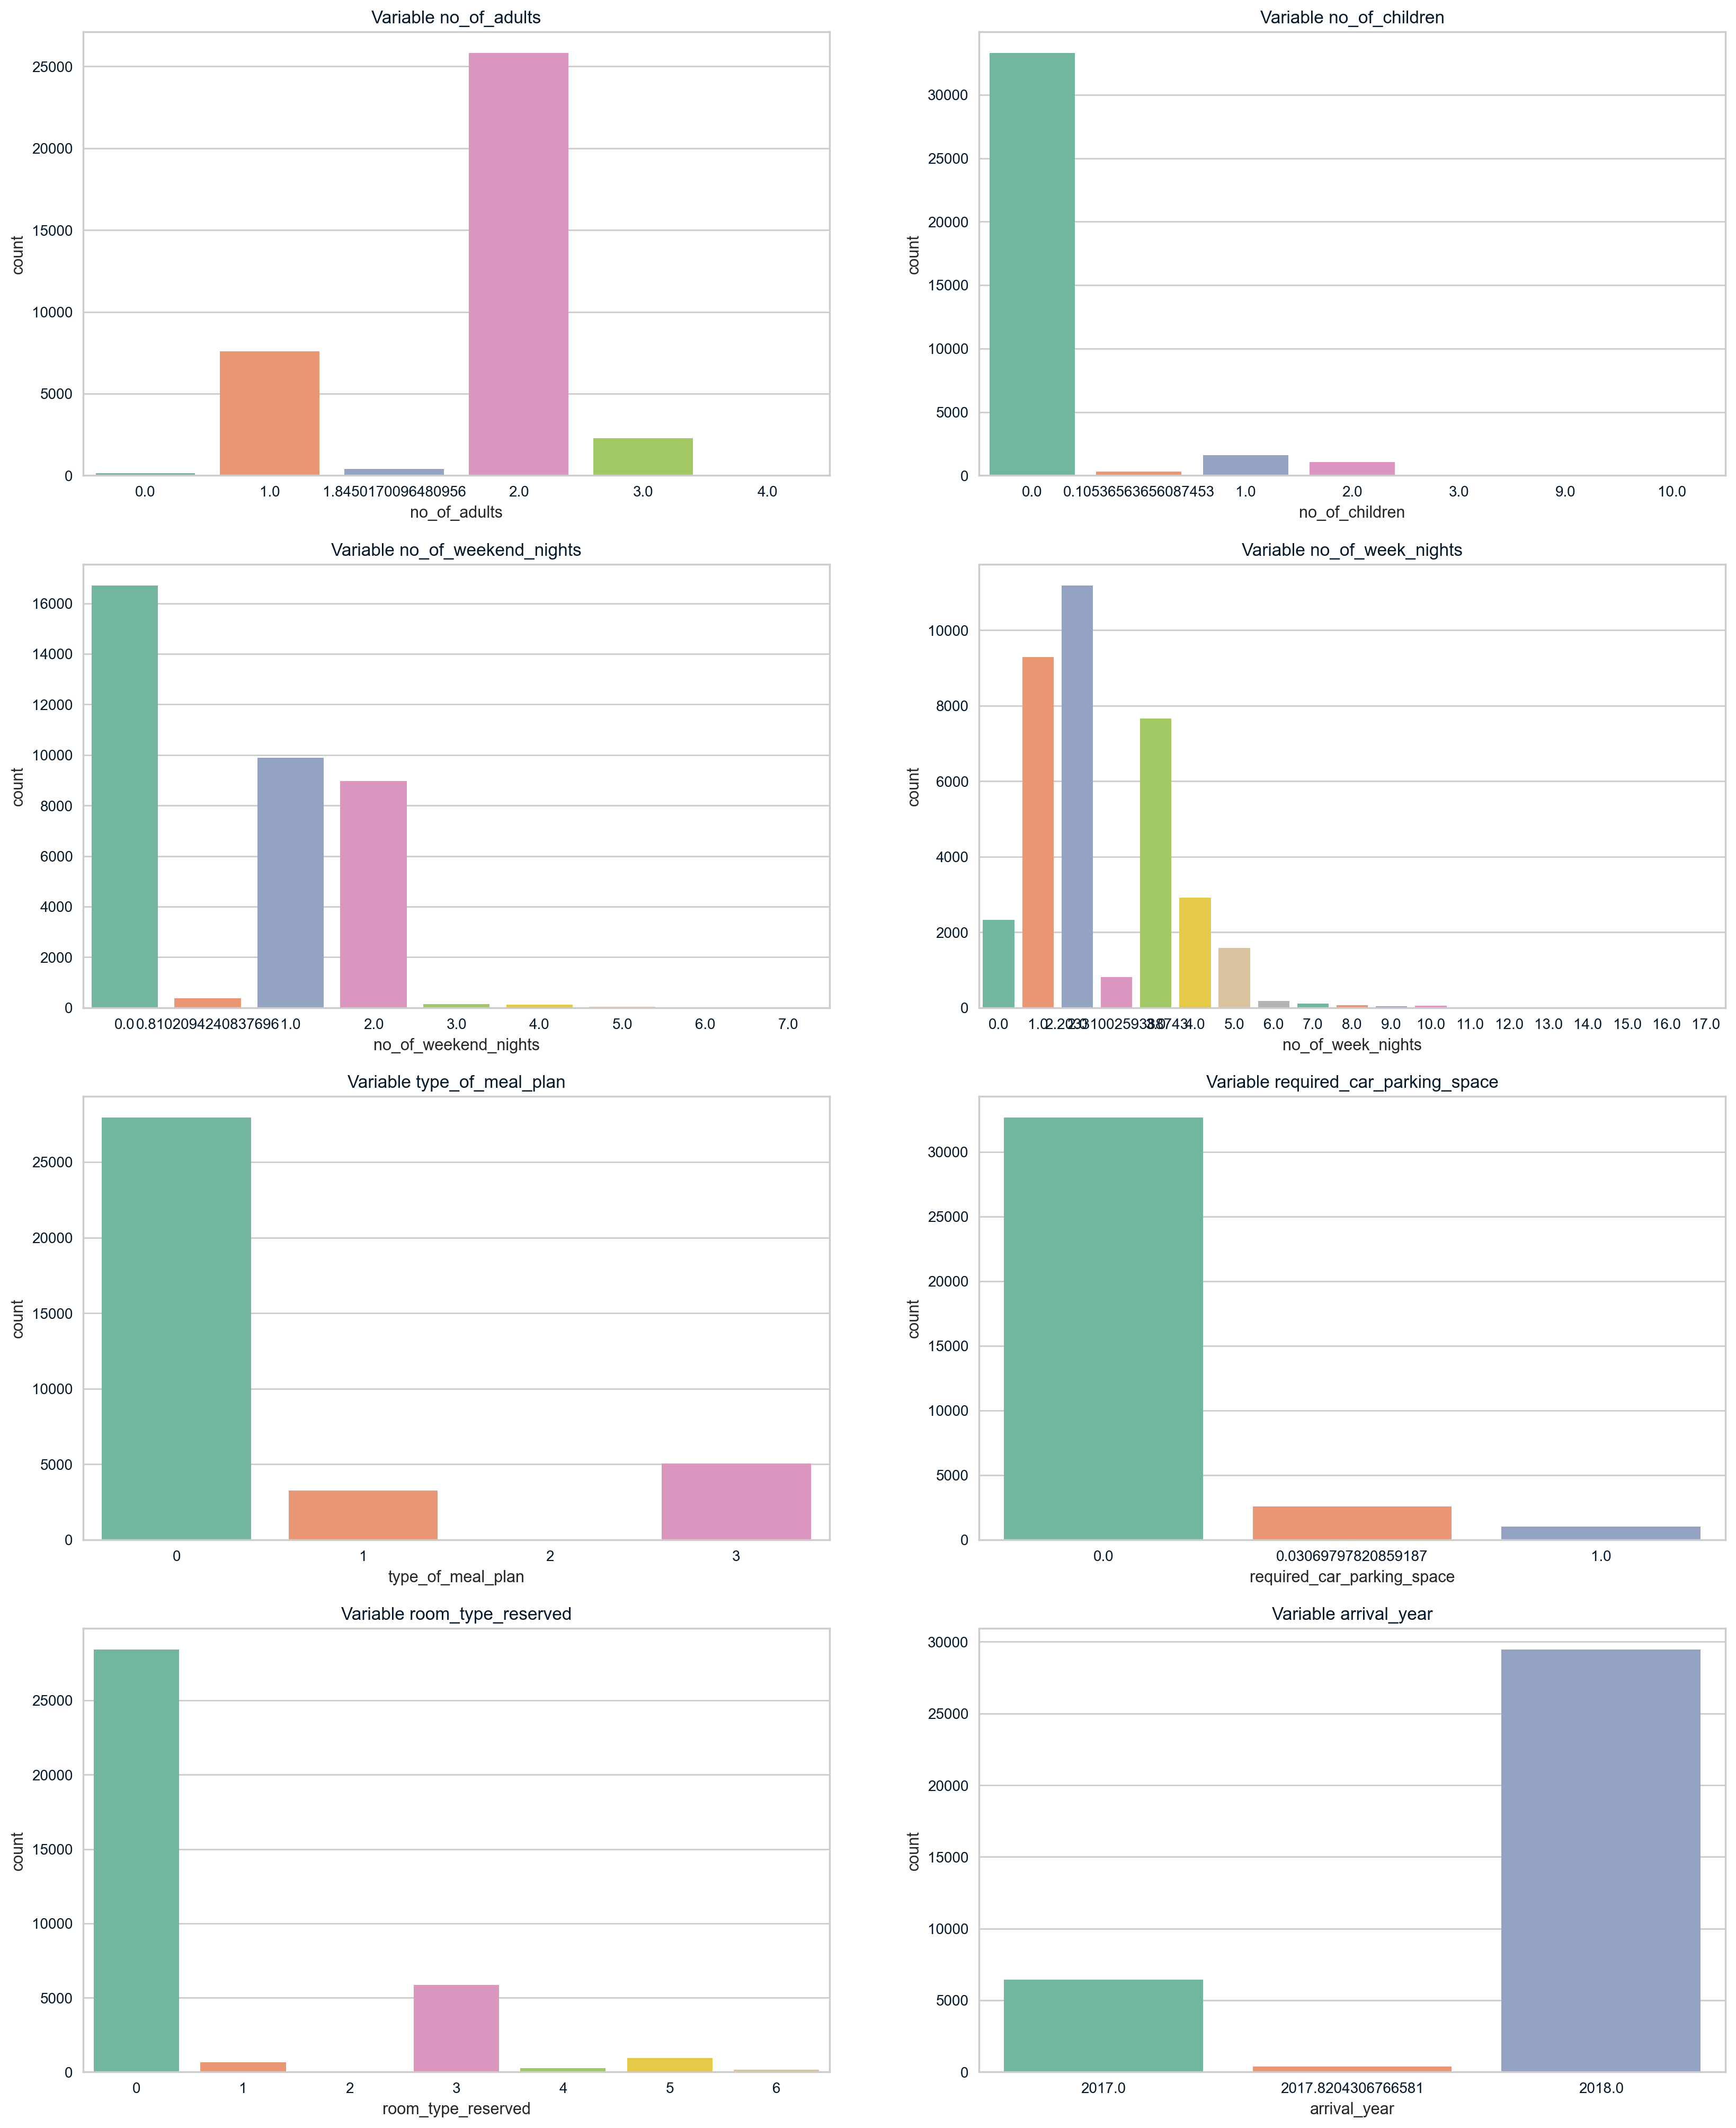

In [61]:



plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Set2', data = hotels)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Set2', data = hotels)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set2', data = hotels)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = hotels)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = hotels)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = hotels)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = hotels)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = hotels)

<AxesSubplot: xlabel='avg_price_per_room'>

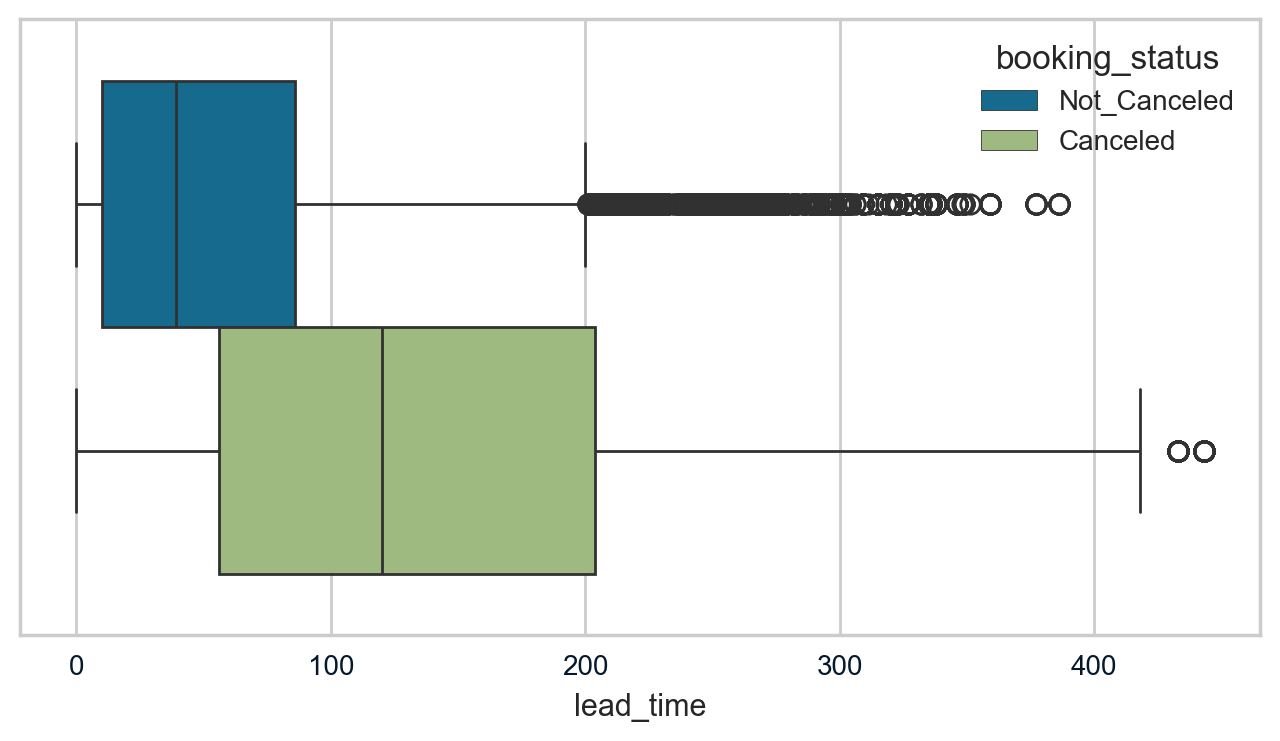

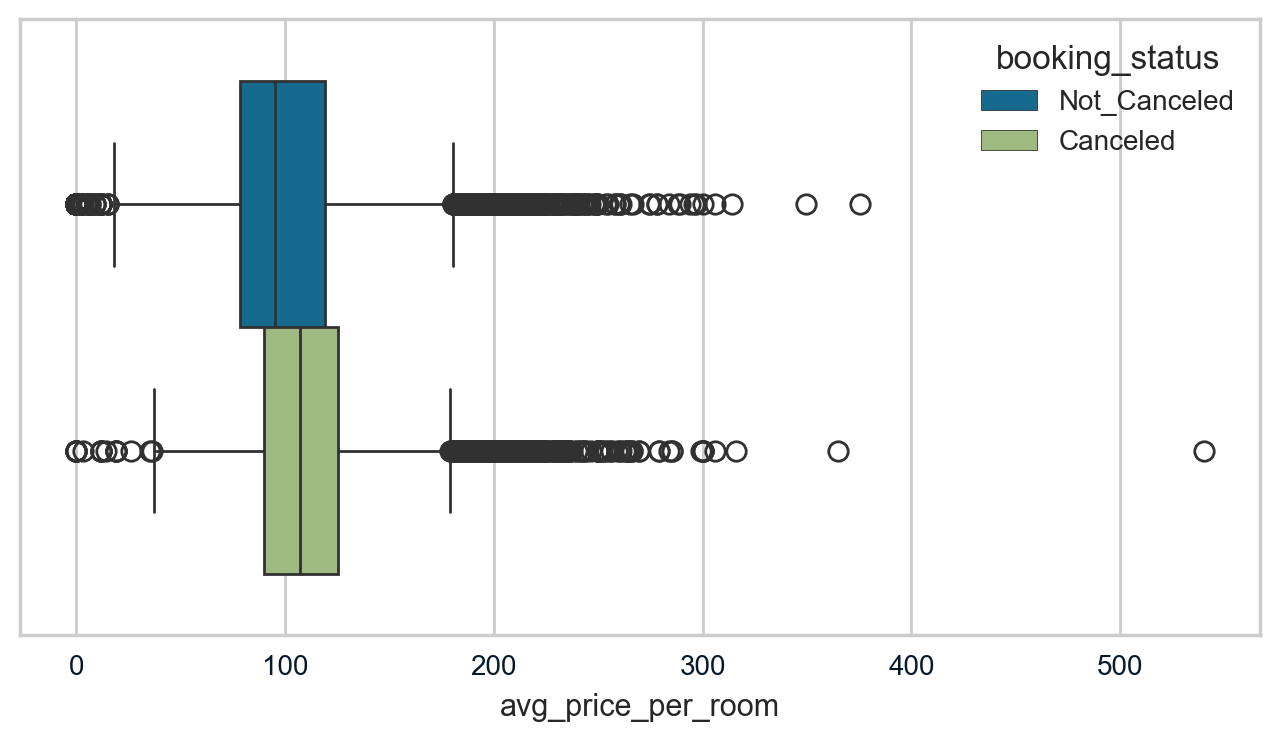

In [34]:
plt.figure(figsize = (8,4 ))
sns.boxplot(data=hotels,x='lead_time',hue='booking_status')

plt.figure(figsize = (8,4 ))
sns.boxplot(data=hotels,x='avg_price_per_room',hue='booking_status')

<AxesSubplot: xlabel='avg_price_per_room', ylabel='lead_time'>

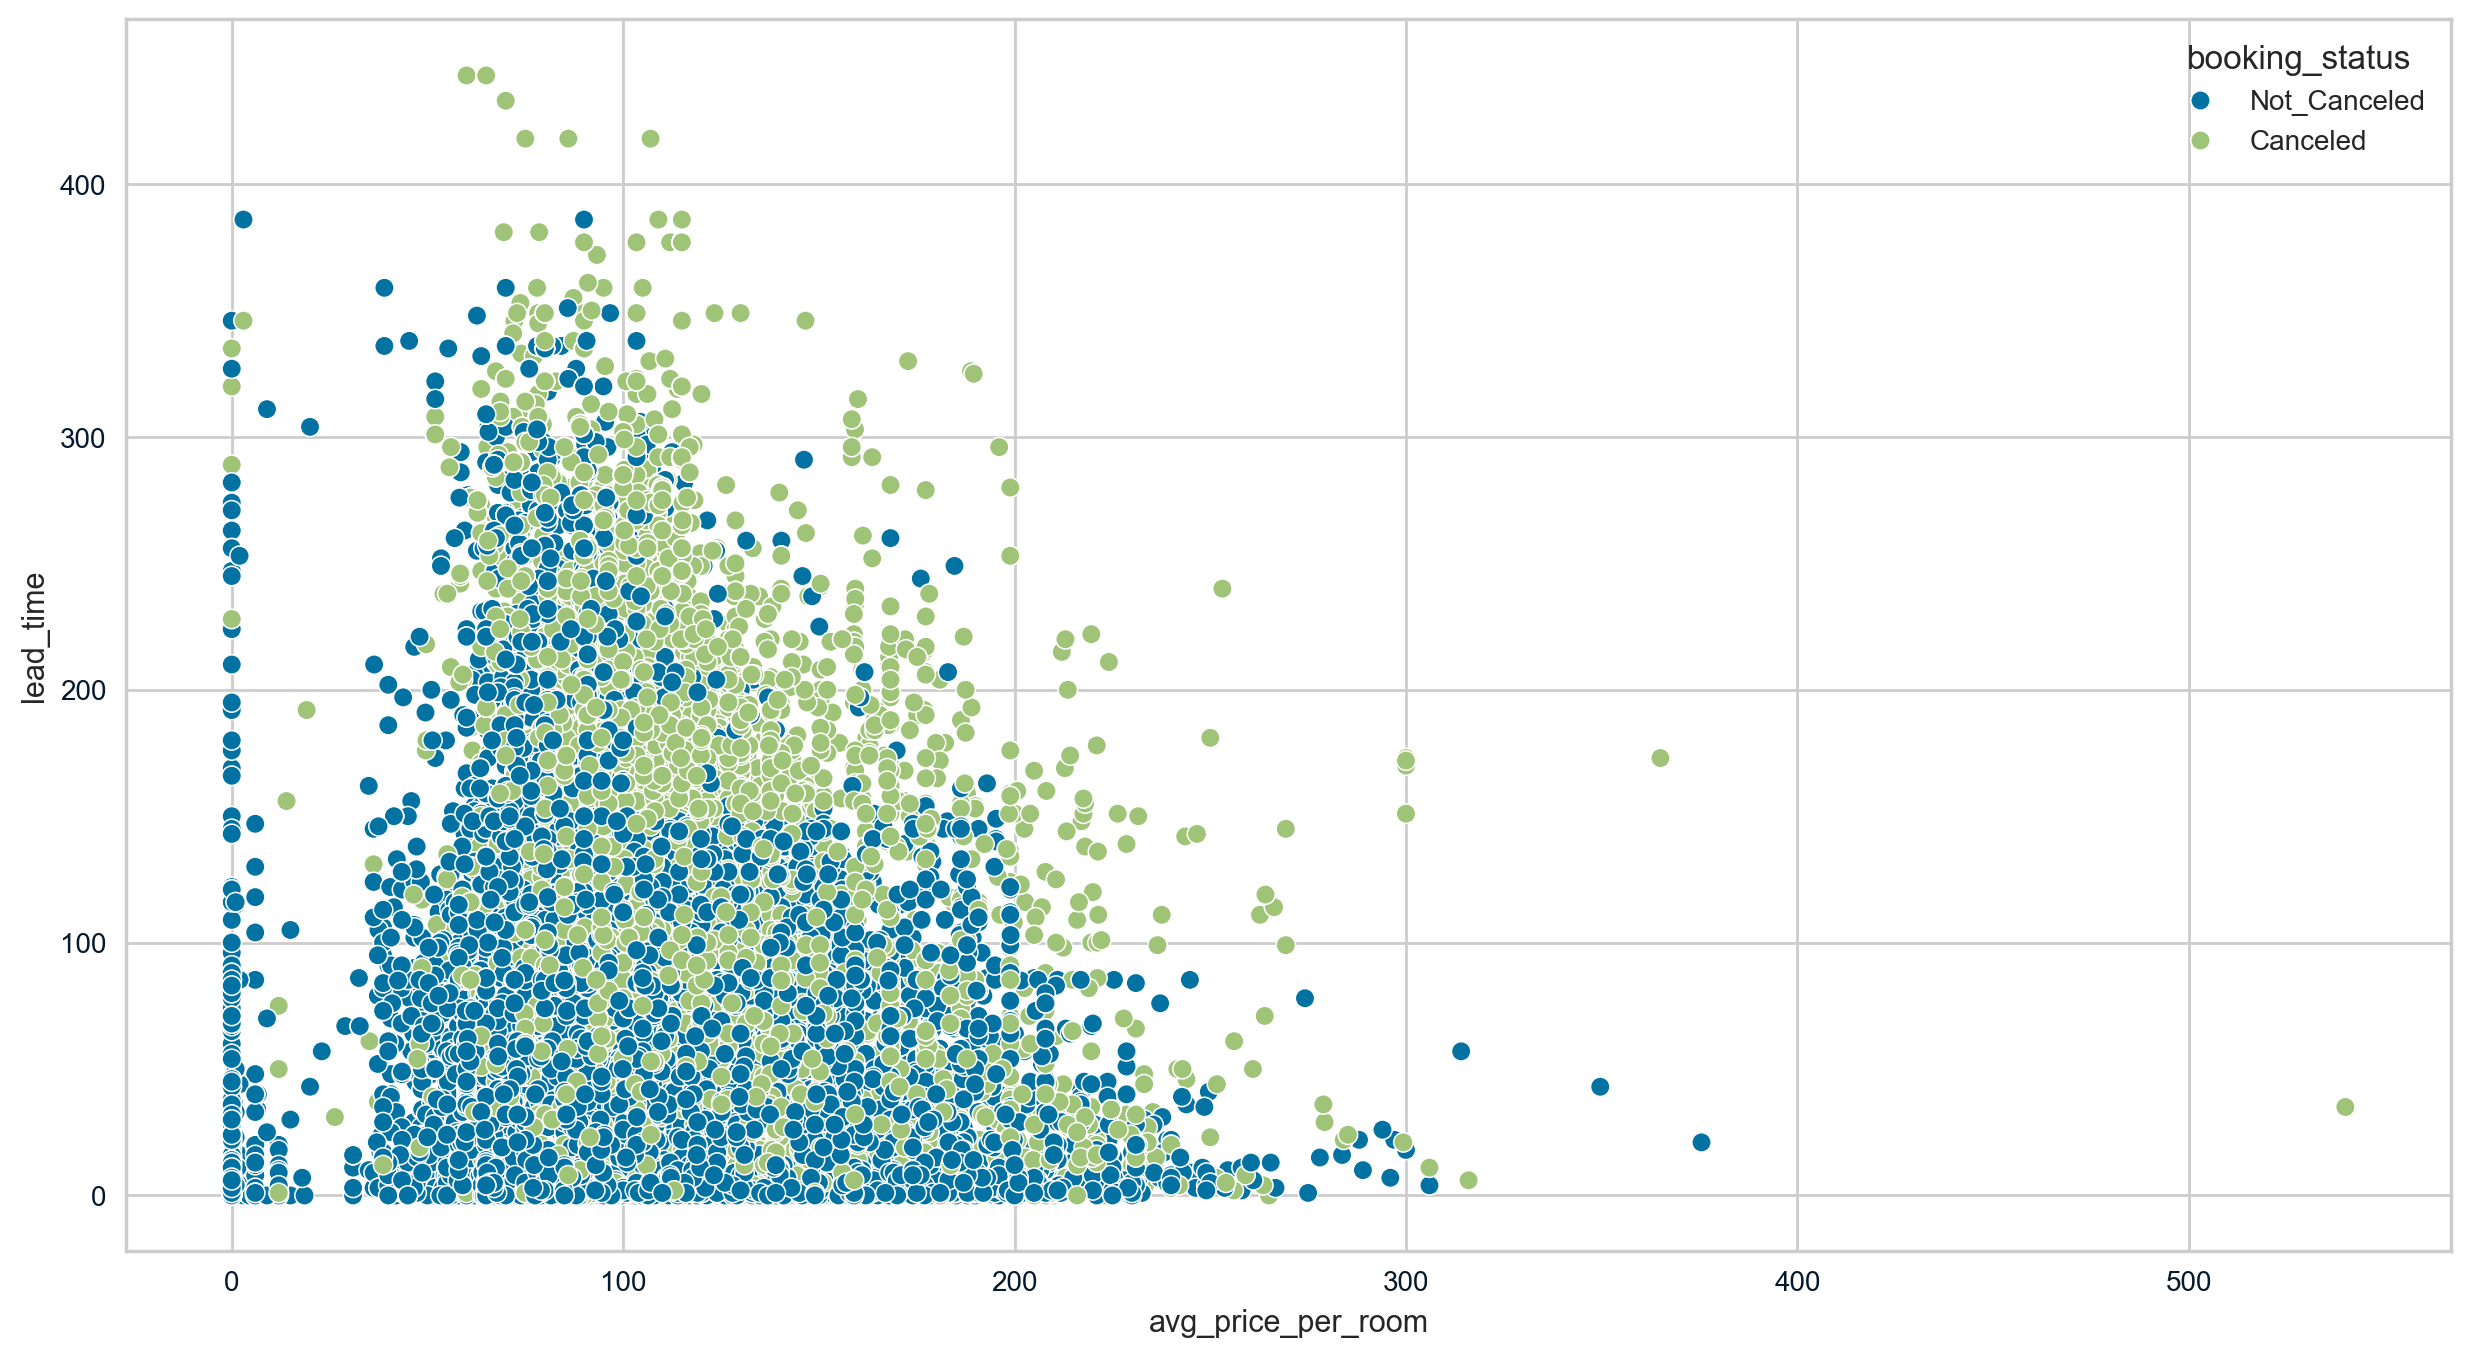

In [35]:
plt.figure(figsize = (15,8))
sns.scatterplot(x='avg_price_per_room',y='lead_time',data=hotels,hue='booking_status')

# **Statring Making Models**

In [36]:
hotels=hotels.drop('Booking_ID',axis=1)

In [37]:
cols=['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']

In [38]:
df=hotels
df.head(2)

no_of_adults  no_of_children  ...  no_of_special_requests  booking_status
0      1.845017        0.105366  ...                0.619343    Not_Canceled
1      2.000000        0.000000  ...                1.000000    Not_Canceled

[2 rows x 18 columns]

In [39]:

df[cols]=df[cols].apply(LabelEncoder().fit_transform)

df.head(5)

no_of_adults  no_of_children  ...  no_of_special_requests  booking_status
0      1.845017        0.105366  ...                0.619343               1
1      2.000000        0.000000  ...                1.000000               1
2      1.000000        0.000000  ...                0.000000               0
3      2.000000        0.000000  ...                0.000000               0
4      2.000000        0.000000  ...                0.000000               0

[5 rows x 18 columns]

In [40]:

X=df.drop('booking_status',axis=True)
y=df['booking_status']


# 1 - **LogisticRegression**

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train , y_train)

LogisticRegression()

In [44]:
y_pred = logreg.predict(X_test)

In [45]:
# let's get the performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results

Model  Accuracy Score  F1 score  Precision    Recall
0  Logistic Regression        0.789172  0.851806   0.801137  0.909317

# **Which Model Should i select**

In [46]:
from tpot import TPOTClassifier 


In [47]:
tpot = TPOTClassifier(generations=7, population_size=7, verbosity=2, offspring_size=10, scoring='accuracy', cv=5) 
tpot.fit(X_train, y_train) 
print(tpot.score(X_test, y_test))

Version 0.11.7 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/77 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8540394331332586

Generation 2 - Current best internal CV score: 0.8540394331332586

Generation 3 - Current best internal CV score: 0.8575314788063272

Generation 4 - Current best internal CV score: 0.8575314788063272

Generation 5 - Current best internal CV score: 0.8575314788063272

Generation 6 - Current best internal CV score: 0.8742556633550065

Generation 7 - Current best internal CV score: 0.8742556633550065

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.8, min_samples_leaf=11, min_samples_split=16, n_estimators=100)
0.8774947623773294


# **Hyper parameterTuning the best model **

In [48]:

from sklearn.ensemble import ExtraTreesClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

model = ExtraTreesClassifier()
gridExtraTrees = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridExtraTrees.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

In [49]:
print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)

Algorithm:  entropy
Score:  0.8823420068448676


In [50]:
extra_trees = ExtraTreesClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
extra_trees.fit(X_train, y_train)
previsoes = extra_trees.predict(X_test)

0.8895137280846841

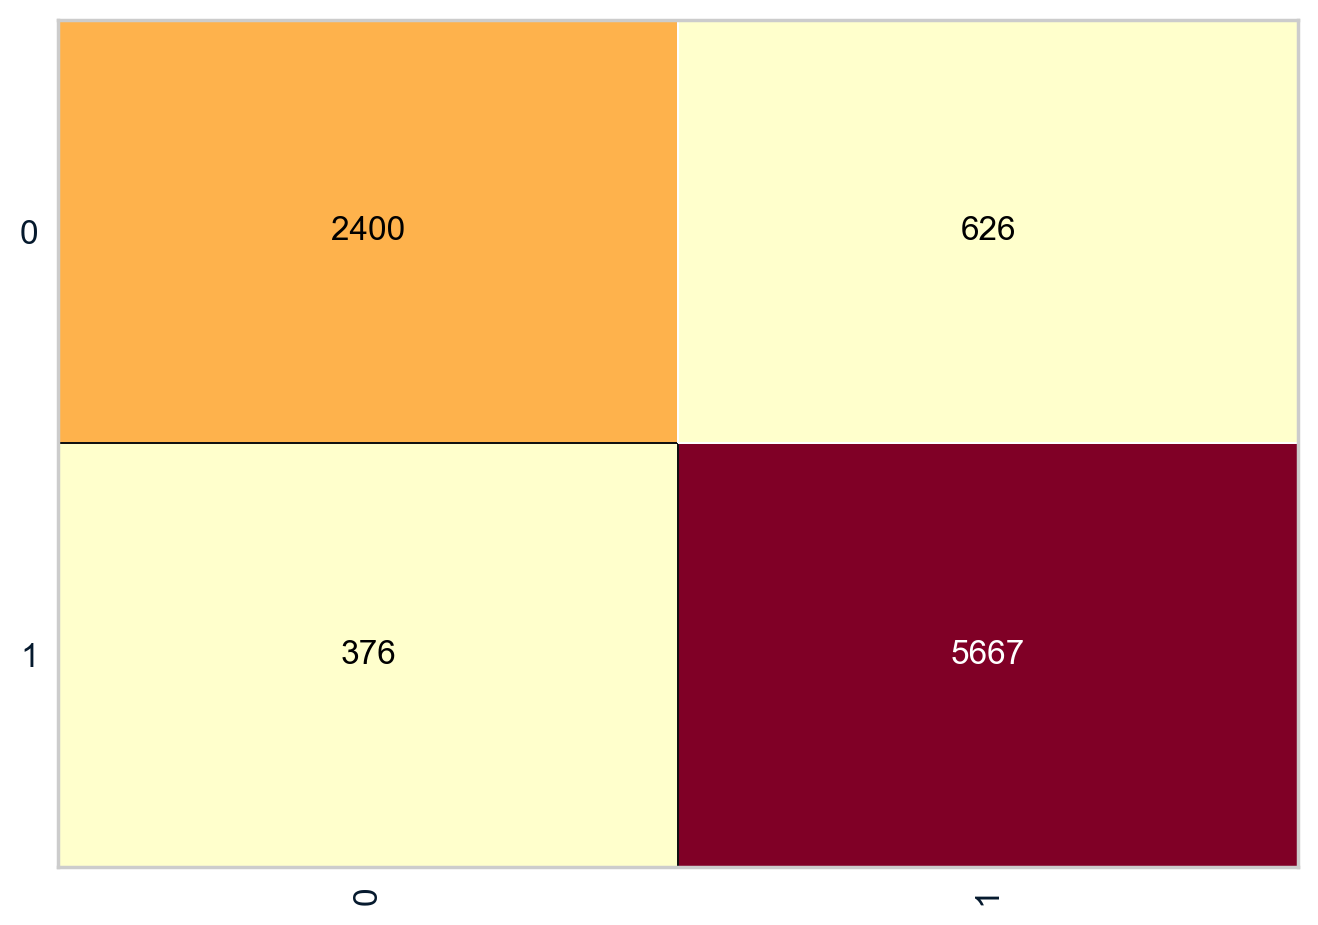

In [51]:

cm = ConfusionMatrix(extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)


# **Neural Network**

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import regularizers

In [53]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)




In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Dense(200, input_dim = 17, kernel_initializer = 'normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(200, kernel_initializer = 'normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer = 'normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer = 'normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(50, kernel_initializer = 'normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, kernel_initializer = 'normal', activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


2024-09-15 19:28:38.606521: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [55]:

from tensorflow.keras.optimizers import Adam
optimitzer = Adam(amsgrad=True)

model.compile(loss='categorical_crossentropy', optimizer = optimitzer, metrics=['acc'])

model.fit(X_train, y_train, epochs = 100, batch_size = 400, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
69/69 [==============================] - 2s 10ms/step - loss: 0.5597 - acc: 0.7299 - val_loss: 12.3919 - val_acc: 0.3337
Epoch 2/100
69/69 [==============================] - 0s 7ms/step - loss: 0.4770 - acc: 0.7830 - val_loss: 65.2508 - val_acc: 0.3337
Epoch 3/100
69/69 [==============================] - 0s 7ms/step - loss: 0.4472 - acc: 0.7987 - val_loss: 86.9916 - val_acc: 0.3337
Epoch 4/100
69/69 [==============================] - 0s 7ms/step - loss: 0.4311 - acc: 0.8082 - val_loss: 51.3265 - val_acc: 0.3337
Epoch 5/100
69/69 [==============================] - 0s 6ms/step - loss: 0.4264 - acc: 0.8090 - val_loss: 40.9935 - val_acc: 0.3337
Epoch 6/100
69/69 [==============================] - 0s 7ms/step - loss: 0.4228 - acc: 0.8110 - val_loss: 47.9001 - val_acc: 0.3337
Epoch 7/100
69/69 [==============================] - 0s 6ms/step - loss: 0.4201 - acc: 0.8111 - val_loss: 72.9449 - val_acc: 0.3337
Epoch 8/100
69/69 [==============================] - 0s 7ms/step - loss: 0.